In [553]:
import matplotlib as mpl

import os
import glob
import json
import re
import time

import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
import cPickle as pkl
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches


In [58]:
import utils as util
import process_datafiles as procd
import aggregate_data as aggr
import plotting

import assign_phase as ph
import scipy.stats as spstats

# Load data

In [7]:
rootdir = '/n/coxfs01/behavior-data'
paradigm = 'threeport'

processed_dir = os.path.join(rootdir, paradigm, 'processed')
metadata = util.get_metadata(paradigm, rootdir=rootdir, filtered=False, create_meta=False)


Loading existing metadata: /n/coxfs01/behavior-data/threeport/metadata.pkl


In [8]:
#### Get all animals in specified cohorts
#cohort_list = ['AK', 'AL', 'AM']
cohort_list = ['AG', 'AJ']

# cohort_list = ['AK', 'AL', 'AM'] #, 'AN'] #, 'AO']
# excluded_animals = ['AM9', 'AM10', 'AM11', 'AM12']
cohortdf = aggr.combine_cohorts_to_dataframe(metadata, cohort_list=cohort_list, excluded_animals=excluded_animals)


('combining data from 2 cohorts:', ['AG', 'AJ'])
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df
... loading existing df


# Select phase

In [61]:
# _ = ph.print_phase_lookup()

In [56]:
#### Select phase to analyze
phase_list = [4, 5]

#### Get data for current phase
df = aggr.get_cohort_data_by_phase(cohortdf, phase_list=phase_list, cohort_list=cohort_list)

### Print info
print("Phase:", sorted(df['phase'].unique()))
object_ids = df['objectid'].unique()
animal_ids = df['animalid'].unique()
print("%i unique animals" % len(animal_ids))
print("Object ids:", object_ids)

no_feedback_flag = len(df[df['no_feedback']==True])>0
print("Has no-feedback trials:", no_feedback_flag)
no_fb = {}

Loading existing metadata: /n/coxfs01/behavior-data/threeport/metadata.pkl
... loading phase data...
/n/coxfs01/behavior-data/threeport/processed/meta/phases_AG.pkl
Loading existing metadata: /n/coxfs01/behavior-data/threeport/metadata.pkl
... loading phase data...
/n/coxfs01/behavior-data/threeport/processed/meta/phases_AJ.pkl


# Create output dir

In [62]:
outdir = os.path.join(processed_dir, 'basic-training', 'pnas-style') #, 'phase-%i' % curr_phase, 'performance')
if not os.path.exists(outdir):
    print("making dir")
    os.makedirs(outdir)
print(outdir)

/n/coxfs01/behavior-data/threeport/processed/basic-training/pnas-style


# Plotting functions

In [63]:
# combine two color maps for 0-50% and 50-100% as in the PNAS paper
pnas_cmap = plotting.get_pnas_cmap()

# Font params
plotting.update_fonts(labelsize=24)

dpi=150


In [64]:
defaults = ph.get_default_params('AL')

default_size = defaults['size']
default_depth_rotation = defaults['depth_rotation']
default_planar_rotation = defaults['planar_rotation']

expected_sizes = defaults['expected_sizes']
expected_drots = defaults['expected_depth_rotations']

# default_size = 30
# default_depth_rotation = 0.
# default_planar_rotation = 0.

# if cohort in ['AL']:
#     expected_sizes = np.linspace(15, 40, 11.)
#     expected_drots = np.linspace(-60, 60, 25.)
#     default_size = 40
    
# elif cohort in ['AG']:
#     expected_sizes = np.linspace(15, 40, 6.)
#     expected_drots = np.linspace(-60, 60, 9.)


# expected_size_interval = np.diff(expected_sizes).mean()
# expected_drot_interval = np.diff(expected_drots).mean()


In [70]:
reload(aggr)
reload(util)

utils.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-package

<module 'utils' from 'utils.py'>

# Check counterbalancing

In [66]:
#### Assign port mapping to df
portmapping = aggr.get_portmapping(df)
df['portmap'] = [0 for _ in np.arange(0, len(df))]
df.loc[df['animalid'].isin(portmapping['Object1_Port1']), 'portmap'] = 1


In [72]:
##### Assign box info
df, bboxes, towers = aggr.assign_box_info(df, metadata)


... getting tower info
... getting setup box info
***** Parsing trials *****
-- saving tmp outfile to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed/tmp_files/AG1_150202.pkl
-- finding stop
N total response events:  0
N total outcome events:  0
Found and removed 0 orphan stimulus events in file /n/coxfs01/behavior-data/threeport/cohort_data/AG/raw/AG1_150202.mwk
N valid trials: 0
***** Parsing trials *****
-- saving tmp outfile to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed/tmp_files/AG5_150202.pkl
-- finding stop
N total response events:  0
N total outcome events:  0
Found and removed 0 orphan stimulus events in file /n/coxfs01/behavior-data/threeport/cohort_data/AG/raw/AG5_150202.mwk
N valid trials: 0
***** Parsing trials *****
-- saving tmp outfile to: /n/coxfs01/behavior-data/threeport/cohort_data/AG/processed/tmp_files/AG6_150202.pkl
-- finding stop
N total response events:  0
N total outcome events:  0
Found and removed 0 orphan stimulus events in f

In [75]:
df.head()

depth_rotation  duration light_position                 name  no_feedback  \
0             -15   5248272           None  Blob_N1_CamRot_y-15        False   
1             -45   5114984           None  Blob_N1_CamRot_y-45        False   
2               0    483175           None    Blob_N1_CamRot_y0        False   
3             -15    599803           None  Blob_N2_CamRot_y-15        False   
4              30   5348239           None   Blob_N1_CamRot_y30        False   

  object  outcome   outcome_time  pos_x  pos_y  ...    session  animalid  \
0      1  success  1747295888345    0.0    0.0  ...   20150608       AG1   
1      1  success  1747306810456    0.0    0.0  ...   20150608       AG1   
2      1  failure  1747315464850    0.0    0.0  ...   20150608       AG1   
3      2  failure  1747320560329    0.0    0.0  ...   20150608       AG1   
4      1  success  1747330169703    0.0    0.0  ...   20150608       AG1   

   cohort  sessionid objectid  phase portmap  boxnum boxpos tower  
0      AG   20150608        1      4       0      14      0     3  
1      AG   20150608        1      4       0      14      0     3  
2      AG   20150608        1      4       0      14      0     3  
3      AG   20150608        2      4       0      14      0     3  
4      AG   20150608        1      4       0      14      0     3  

[5 rows x 27 columns]

In [76]:
print("Towers:", df['tower'].unique())
print("Boxes:", sorted(df['boxnum'].unique()))


('Towers:', array([u'3', u'4'], dtype=object))
('Boxes:', [10, 11, 13, 14, 15, 16, 17])


# Set common colors

In [77]:
tower_colors = dict((t, c) for t, c in zip(sorted(towers.keys(), key=util.natural_keys),
                                           sns.color_palette('colorblind', n_colors=len(towers.keys()))))
boxpos_colors = dict((t, c) for t, c in zip(np.arange(0, 4),
                                           sns.color_palette('cubehelix', n_colors=4)))

feature_colors = {'objectid': sns.color_palette('colorblind', n_colors=2),
                  'portmap': ['magenta', 'forestgreen'],
                  'twinx': ['tab:red', 'tab:blue'],
                  'tower': tower_colors,
                  'box_pos': boxpos_colors}


# Look at general stats

In [78]:
cohort_str = []
for cohort in cohort_list:
    anums = [int(re.search(r'(\d+)', a).group()) for a in animal_ids \
             if re.search(r'(\D+)', a).group()==cohort]
    cohort_str.append('%s%i-%i' % (cohort, min(anums), max(anums)))

#figid = 'phase%i_cohorts_%s\n%s' % (curr_phase, '-'.join(cohort_list), ' | '.join(cohort_str))
figid = 'phase%s_cohorts_%s\n%s' % ('-'.join([str(p) for p in phase_list]), '-'.join(cohort_list), ' | '.join(cohort_str))

print(figid)


phase4-5_cohorts_AG-AJ
AG1-11 | AJ1-16


In [79]:
start_t = time.time()

splitdf = [pd.DataFrame({'animalid': animalid,
                         'cohort': re.search(r'(\D+)', animalid).group(),
                          'session': int(re.search(r'(\d+)', sessionid).group()),
                          'sessionid': sessionid,
                          'objectid': objectid,
                          'boxnum': g['boxnum'].unique()[0],
                          'tower':  g['tower'].unique()[0],
                          'boxpos':  g['boxpos'].unique()[0],
                          'portmap':  g['portmap'].unique()[0],
                          'phase':  g['phase'].unique()[0],
                          'mean_rt': g['response_time'].mean(),
                          'split_accuracy': g['outcome'].value_counts()['success'] / float(g['outcome'].value_counts().sum()) \
                                    if 'success' in g['outcome'].value_counts().keys() else 0.,
                          'n_trials': float(g['outcome'].value_counts().sum())}, index=[i])\
                               for i, ((animalid, sessionid, objectid), g) \
                  in enumerate(df.groupby(['animalid', 'sessionid', 'objectid']))]
splitdf = pd.concat(splitdf, axis=0)
end_t = time.time() - start_t
print("Elapsed: {0:.2f}sec".format(end_t))

Elapsed: 11.14sec


In [80]:
start_t = time.time()
perfdf = [pd.DataFrame({'animalid': animalid,
                         'cohort': re.search(r'(\D+)', animalid).group(),
                          'session': int(re.search(r'(\d+)', sessionid).group()),
                          'sessionid': sessionid,
                          'boxnum': g['boxnum'].unique()[0],
                          'tower':  g['tower'].unique()[0],
                          'boxpos':  g['boxpos'].unique()[0],
                          'portmap':  g['portmap'].unique()[0],
                          'phase':  g['phase'].unique()[0],
                          'mean_rt': g['response_time'].mean(),
                          'overall_accuracy': g['outcome'].value_counts()['success'] / float(g['outcome'].value_counts().sum()) \
                                    if 'success' in g['outcome'].value_counts().keys() else 0.,
                          'n_trials': float(g['outcome'].value_counts().sum())}, index=[i])\
                               for i, ((animalid, sessionid), g) \
                  in enumerate(df.groupby(['animalid', 'sessionid']))]
perfdf = pd.concat(perfdf, axis=0)
end_t = time.time() - start_t
print("Elapsed: {0:.2f}sec".format(end_t))

Elapsed: 5.59sec


In [82]:
outdir

'/n/coxfs01/behavior-data/threeport/processed/basic-training/pnas-style'

# Visualize some overall stats

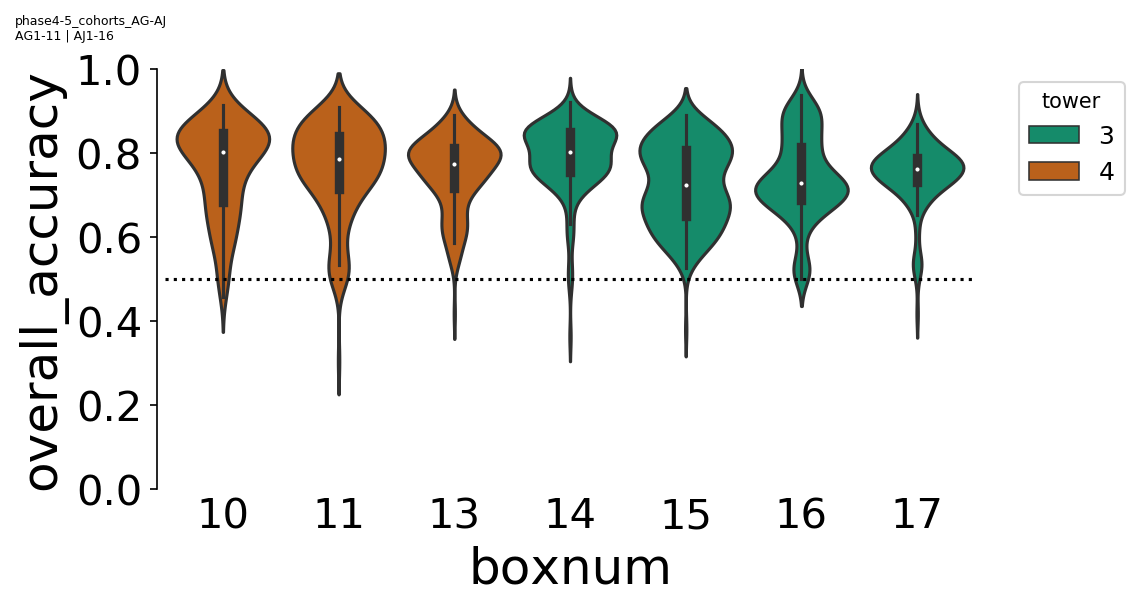

In [87]:
factor = 'boxnum'
hue = 'tower'

palette = feature_colors[hue] if hue in feature_colors.keys() else 'colorblind'

fig, ax = pl.subplots(figsize=(8,4), dpi=dpi)
# sns.boxplot(x=factor, y='overall_accuracy', data=perfdf, ax=ax,
#            fliersize=2, width=.8, hue=hue, dodge=hue!='tower', palette=palette)
sns.violinplot(x=factor, y='overall_accuracy', data=perfdf, ax=ax,
           width=.8, hue=hue, dodge=hue!='tower', palette=palette)
ax.axhline(y=0.5, linestyle=':', color='k')

ax.set_ylim([0, 1])
sns.despine(trim=True, offset=4, bottom=True)
ax.tick_params(axis='x', size=0)
ax.legend(bbox_to_anchor=(1.2, 1), title=hue)
fig.text(0, 0.95, figid, fontsize=6)

pl.subplots_adjust(bottom=0.2, right=0.8, top=0.9)

figname = 'accuracy_by_%s_hue-%s_overall' % (factor, hue)
# pl.savefig(os.path.join(outdir, '%s.png' % figname))
# print(figname)
# print(outdir)

In [384]:
towers

{u'1': [22, 23, 24, 25],
 u'2': [18, 19, 20, 21],
 u'3': [14, 15, 16, 17],
 u'4': [10, 11, 12, 13]}

In [93]:
outdir

'/n/coxfs01/behavior-data/threeport/processed/basic-training/pnas-style'

## Plot accuracy by feature

boxpos_accuracy_boxplot_hue-cohort_
/n/coxfs01/behavior-data/threeport/processed/basic-training/pnas-style


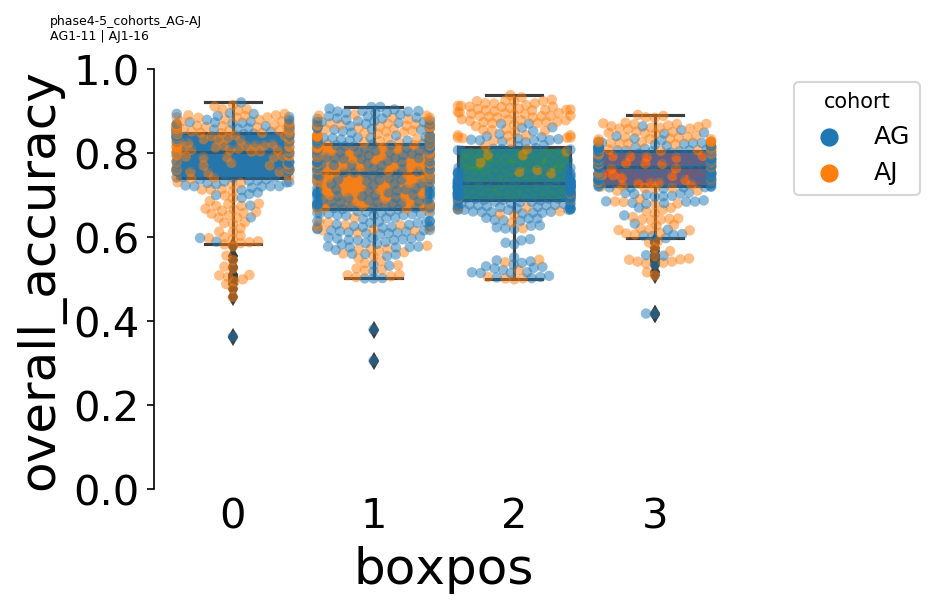

In [106]:
hue = 'cohort' #'cohort' # None
factor = 'boxpos'
plot_each_session = False


point_str = 'plot-each-session' if plot_each_session else ''
hue_str = 'hue-%s' % hue if hue is not None else ''
metric = 'split_accuracy' if split else 'overall_accuracy'

tdf = splitdf.copy() if 'object' in hue else perfdf.copy()
 
fig, ax = pl.subplots(figsize=(6,4), dpi=dpi)
sns.boxplot(x=factor, y=metric, data=tdf, ax=ax,
           dodge=True)


color = 'k' if hue is None else None
if plot_each_session or hue is not None:
    sns.swarmplot(x=factor, y=metric, data=tdf, ax=ax,
               hue=hue, color=color, alpha=0.5)
ax.set_ylim([0, 1])

sns.despine(trim=True, offset=4, bottom=True)
ax.tick_params(axis='x', size=0)
if hue is not None:
    ax.legend(bbox_to_anchor=(1.1, 1), title=hue)

pl.subplots_adjust(bottom=0.2, right=0.75, top=0.9)
    
    
fig.text(0, 0.95, '%s' % (figid), fontsize=6)

figname = '%s_accuracy_boxplot_%s_%s' % (factor, hue_str, point_str)
pl.savefig(os.path.join(outdir, '%s.png' % figname))
print(figname)
print(outdir)

In [392]:
perfdf['portmap'].unique()

array([0, 1])

boxnum_overall-accuracy_hue-tower_split-violin
/n/coxfs01/behavior-data/threeport/processed/basic-training/pnas-style


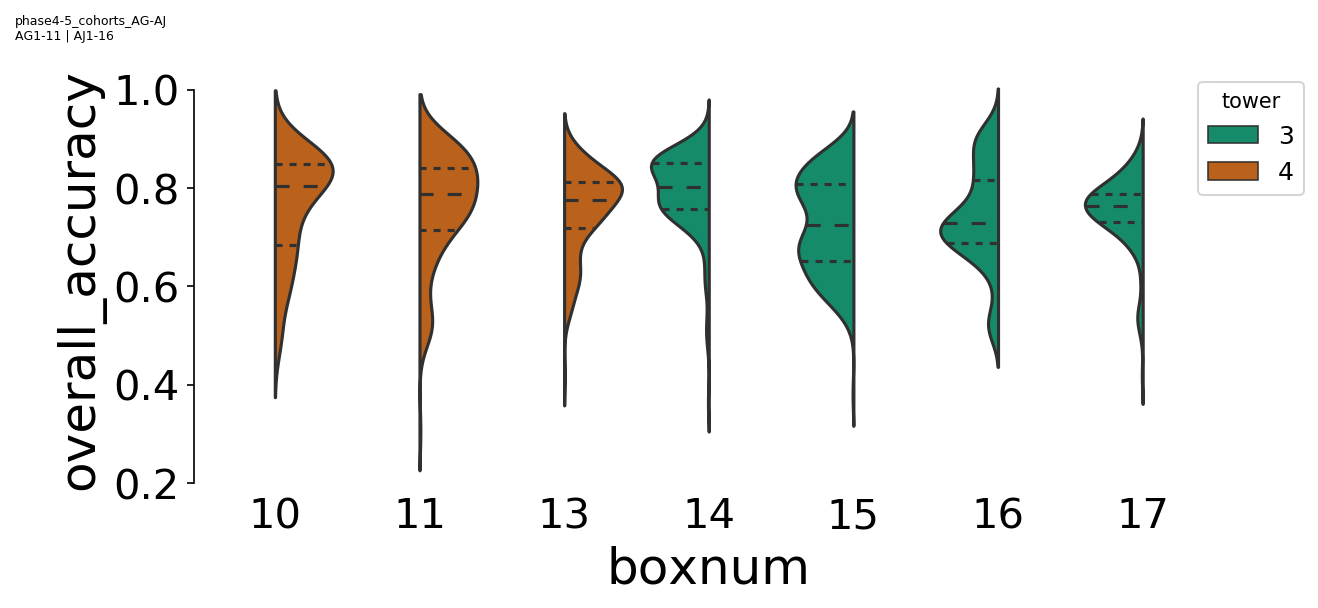

In [107]:
hue = 'tower' #'portmap'
factor = 'boxnum' #'bbox'

curr_colors = feature_colors[hue]
split_plot = hue is not None
tdf = splitdf.copy() if hue=='objectid' else perfdf.copy()
metric = 'split_accuracy' if hue=='objectid' else 'overall_accuracy'
color = 'k' if hue is None else None
hue_str = 'hue-%s' % hue if hue is not None else ''
plot_type = 'violin' if hue is None else 'split-violin'


fig, ax = pl.subplots(figsize=(10,4), dpi=dpi)
sns.violinplot(x=factor, y=metric, data=tdf, ax=ax,
           hue=hue, split=split_plot, scale="count", inner="quartile", palette=curr_colors)

sns.despine(trim=True, offset=4, bottom=True)
ax.tick_params(axis='x', size=0)
if hue is not None:
    ax.legend(bbox_to_anchor=(1.1, 1), title=hue)
    
fig.text(0, 0.95, '%s' % (figid), fontsize=6)

pl.subplots_adjust(bottom=0.2, right=0.8, top=0.9)

figname = '%s_%s_%s_%s' % (factor, metric.replace('_', '-'), hue_str, plot_type)
print(figname)
print(outdir)

pl.savefig(os.path.join(outdir, '%s.png' % figname))


In [396]:
df['boxnum'].unique()

array([16, 15, 17, 12, 19, 14, 11, 10, 13, 20, 21])

# Stat test interactions

In [98]:
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import statsmodels.api as sm


In [99]:
# Fits the model with the interaction term
# This will also automatically include the main effects for each factor

standarddf_no0 = perfdf.copy()
#standarddf_no0 = standarddf_split[standarddf_split['bbox']!=0].copy()

model = ols('overall_accuracy ~ C(boxpos)*C(tower)', standarddf_no0).fit()

# Seeing if the overall model is significant
print("Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}".format(model=model))
    

Overall model F( 6, 1393) =  9.804, p =  0.0000


In [100]:
model.summary()

# The Durban-Watson tests is to detect the presence of autocorrelation, 
# Jarque-Bera tests the assumption of normality, 
# Omnibus tests the assumption of homogeneity of variance, 
# and the Condition Number assess multicollinearity. 
# Condition Number values over 20 are indicative of multicollinearity.


/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/statsmodels/regression/linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in divide
  return self.params / self.bse
/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= sel

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       overall_accuracy   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     9.804
Date:                Wed, 25 Mar 2020   Prob (F-statistic):           1.32e-10
Time:                        12:26:26   Log-Likelihood:                 1292.2
No. Observations:                1400   AIC:                            -2570.
Df Residuals:                    1393   BIC:                            -2534.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.7909      0.007    110.098      0.000       0.777       0.805
C(boxpos)[T.1]                  -0.0668      0.009     -7.151      0.000      -0.085      -0.048
C(boxpos)[T.2]                  -0.0493      0.009     -5.549      0.000      -0.067      -0.032
C(boxpos)[T.3]                  -0.0414      0.011     -3.774      0.000      -0.063      -0.020
C(tower)[T.4]                   -0.0271      0.011     -2.433      0.015      -0.049      -0.005
C(boxpos)[T.1]:C(tower)[T.4]     0.0646      0.015      4.410      0.000       0.036       0.093
C(boxpos)[T.2]:C(tower)[T.4]          0          0        nan        nan           0           0
C(boxpos)[T.3]:C(tower)[T.4]     0.0310      0.016      1.994      0.046       0.001       0.062
==============================================================================
Omnibus:                      128.292   Durbin-Watson:                   0.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.241
Skew:                          -0.754   Prob(JB):                     1.78e-37
Kurtosis:                       3.792   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [101]:
# Creates the ANOVA table
res = sm.stats.anova_lm(model, typ= 2)
res

/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)
/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/statsmodels/base/model.py:1543: RuntimeWarning: invalid value encountered in divide
  F /= J
/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)


sum_sq      df          F        PR(>F)
C(boxpos)            0.473453     3.0  16.988137  5.136705e-08
C(tower)                  NaN     1.0        NaN           NaN
C(boxpos):C(tower)   0.274337     3.0   9.843570  5.687475e-05
Residual            12.940804  1393.0        NaN           NaN

In [103]:
mc = statsmodels.stats.multicomp.MultiComparison(standarddf_no0['overall_accuracy'], standarddf_no0['boxpos'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1    -0.0408  -0.0594 -0.0221  True 
  0      2    -0.0381  -0.0577 -0.0184  True 
  0      3    -0.0279  -0.0477  -0.008  True 
  1      2     0.0027  -0.0155  0.0208 False 
  1      3     0.0129  -0.0054  0.0313 False 
  2      3     0.0102  -0.0092  0.0296 False 
---------------------------------------------


In [108]:
mc = statsmodels.stats.multicomp.MultiComparison(standarddf_no0['overall_accuracy'], standarddf_no0['tower'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
  3      4     0.0115  0.0007 0.0223  True 
-------------------------------------------


In [110]:
vs = [g['overall_accuracy'].values for p, g in standarddf_no0.groupby(['boxpos'])]
spstats.kruskal(*vs)

KruskalResult(statistic=50.01723324799389, pvalue=7.921948520729422e-11)

In [111]:
vs = [g['overall_accuracy'].values for p, g in standarddf_no0.groupby(['tower'])]
spstats.kruskal(*vs)

KruskalResult(statistic=10.279029667884682, pvalue=0.0013455068867693285)

In [113]:
vs = [g['overall_accuracy'].values for p, g in standarddf_no0.groupby(['boxnum'])]
spstats.kruskal(*vs)

KruskalResult(statistic=77.67472481415754, pvalue=1.0788785059603085e-14)

# Look at performance as a function of time

In [458]:
pl.rcParams.update(mpl.rcParamsOrig)


In [459]:
update_fonts(big=True)

## Individuals

In [134]:
outdir

'/n/coxfs01/behavior-data/threeport/processed/basic-training/pnas-style'

In [133]:
if not os.path.exists(os.path.join(outdir, 'individuals')):
    os.makedirs(os.path.join(outdir, 'individuals'))


In [116]:
mean_acc

NameError: name 'mean_acc' is not defined

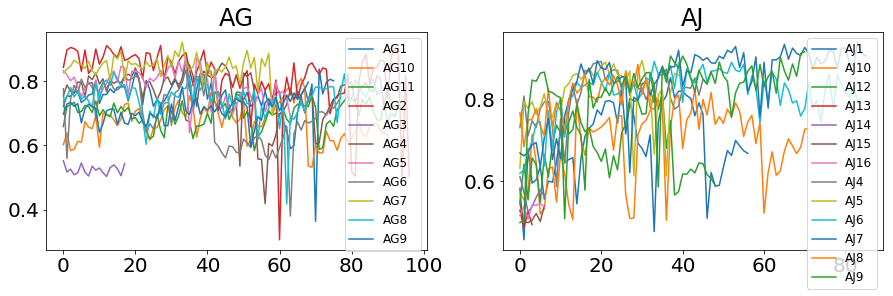

In [118]:
fig, axes = pl.subplots(1, len(cohort_list), figsize=(15, 4))

for (cohort, animalid), g in perfdf[perfdf['phase'].isin([4, 5])].groupby(['cohort', 'animalid']):
    axi = list(cohort_list).index(cohort)
    ax = axes[axi]
    
    session_list = [s for s, sg in g.sort_values(by='sessionid').groupby(['sessionid'])]
    mean_acc = [sg['overall_accuracy'].values[0] for s, sg in g.sort_values(by='sessionid').groupby(['sessionid'])]
    ax.plot(np.arange(0, len(session_list)), mean_acc, label=animalid)
    #ax.plot(session_list, mean_acc)
    ax.set_title(cohort)
    ax.legend()

In [130]:
perfdf[['cohort', 'animalid']].drop_duplicates()['cohort'].value_counts()

AJ    13
AG    11
Name: cohort, dtype: int64

In [131]:
figsz = {'AK': (6, 2),
         'AL': (8, 2),
         'AM': (4, 2),
         'AG': (6, 2),
         'AJ': (7, 2)}


(2, 6)
(2, 7)


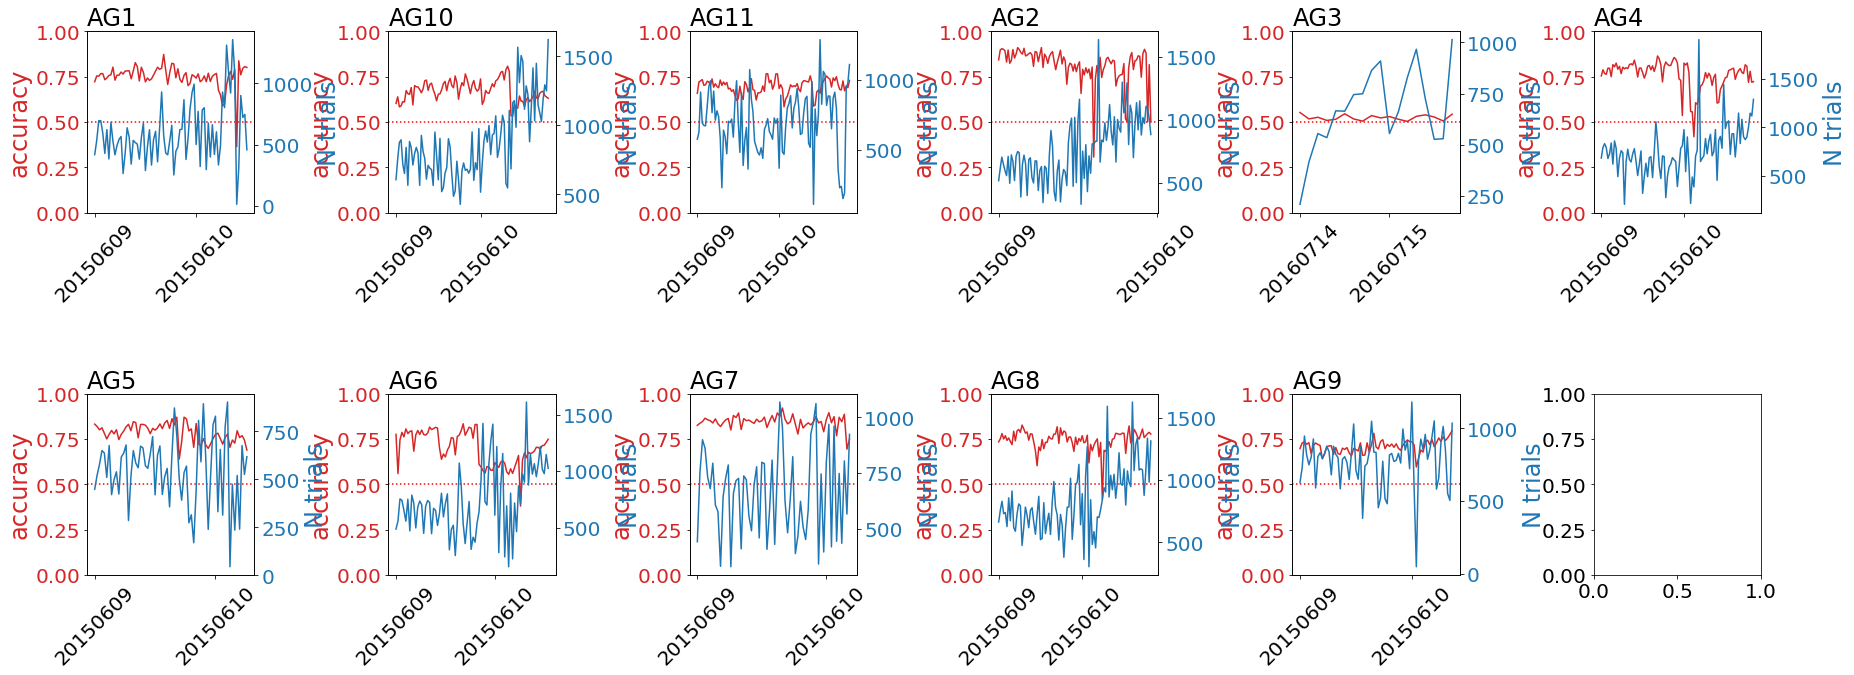

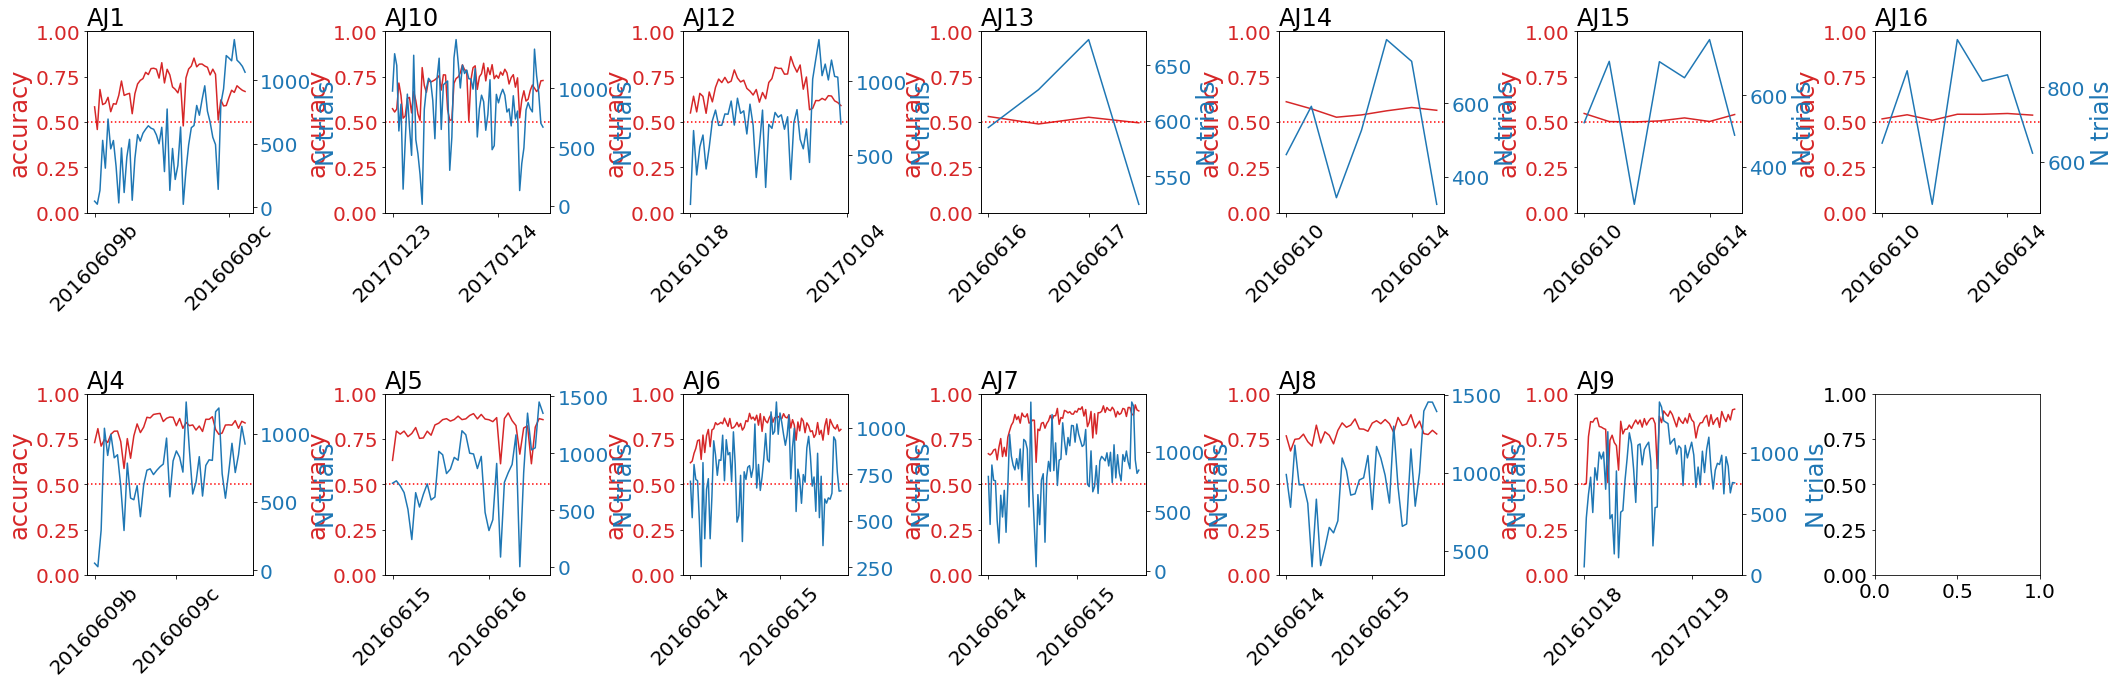

In [136]:
axis_colors = {0: 'tab:red', 1: 'tab:blue'}

tdf =  perfdf.copy()

for cohort in tdf['cohort'].unique(): #curr_cohort_list:
    nc, nr = figsz[cohort]
    print(nr, nc)
    fig, axes = pl.subplots(nr, nc, figsize=(nc*5,nr*5))
    for ax, (animalid, ddf) in zip(axes.flat, tdf[tdf['cohort']==cohort].groupby(['animalid'])):

        xvs = [s for s, g in ddf.groupby(['sessionid'])]
        xis = np.arange(0, len(xvs))

        yvs= [g['overall_accuracy'].values[0] for s, g in ddf.groupby(['sessionid'])]
        ax.plot(xis, yvs, color=axis_colors[0])

        ax.tick_params(axis='y', labelcolor=axis_colors[0])
        ax.set_ylabel('accuracy', color=axis_colors[0])
        ax.set_ylim([0, 1])
        ax.axhline(y=0.5, linestyle=':', color='r')

        ax.set_xticklabels(xvs, rotation=45)
        #ax.tick_params(axis='x', rotation=45)

        ax2 = ax.twinx()
        twinvs = [g['n_trials'].values[0] for s, g in ddf.groupby(['sessionid'])]
        ax2.plot(xis, twinvs, color=axis_colors[1])
        ax2.tick_params(axis='y', labelcolor=axis_colors[1])
        ax2.set_ylabel('N trials', color=axis_colors[1])

        ax.set_title(animalid, loc='left')
        ax.set_xticklabels(xvs, rotation=45)

    pl.subplots_adjust(hspace=1, wspace=0.8)

    figname = '_by-animal_accuracy-and-ntrials_cohort-%s_all-transforms' % cohort

    pl.savefig(os.path.join(outdir, 'individuals', '%s.png' % figname))

(2, 6)
(2, 7)


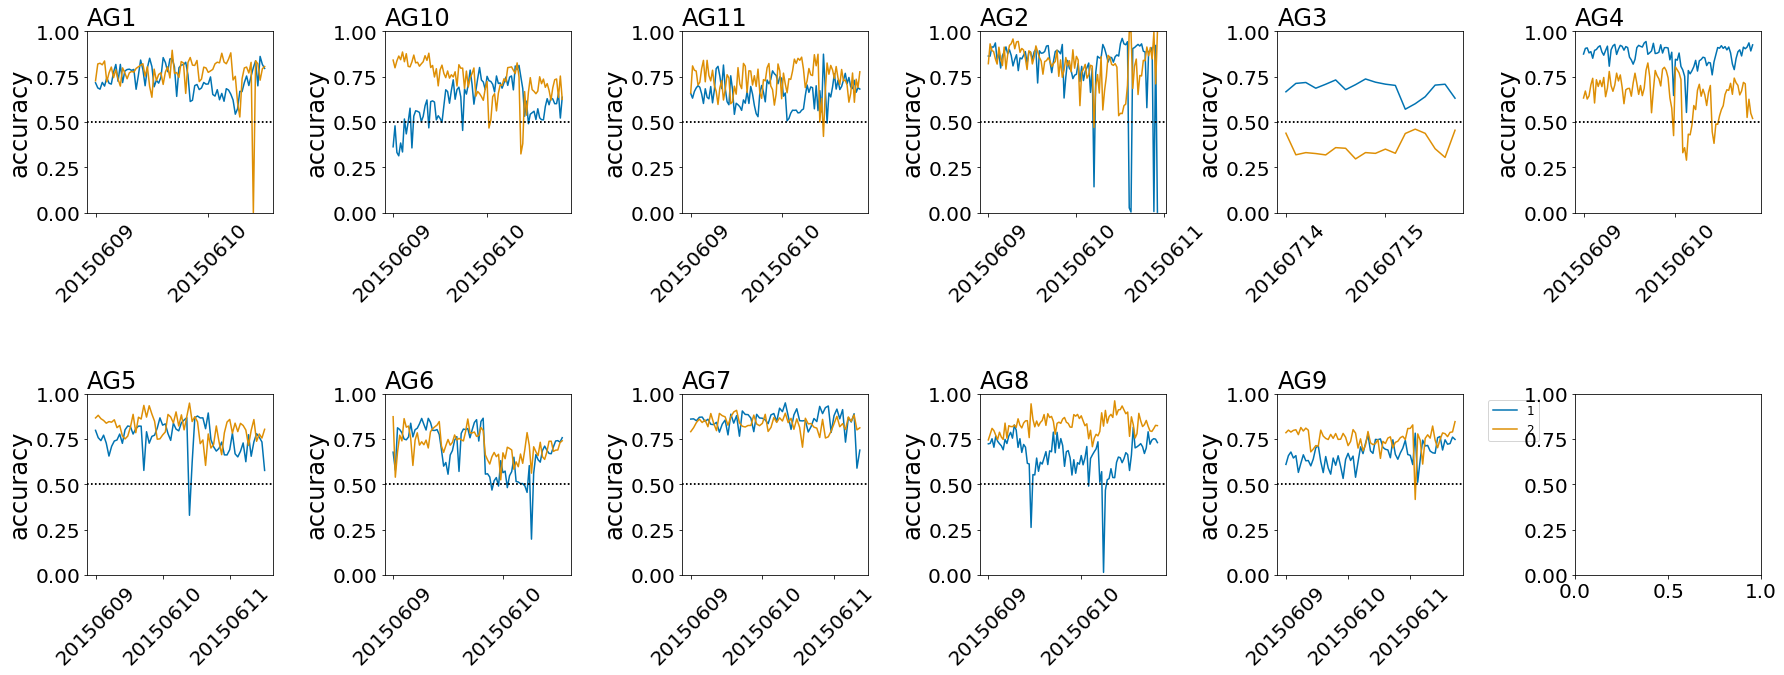

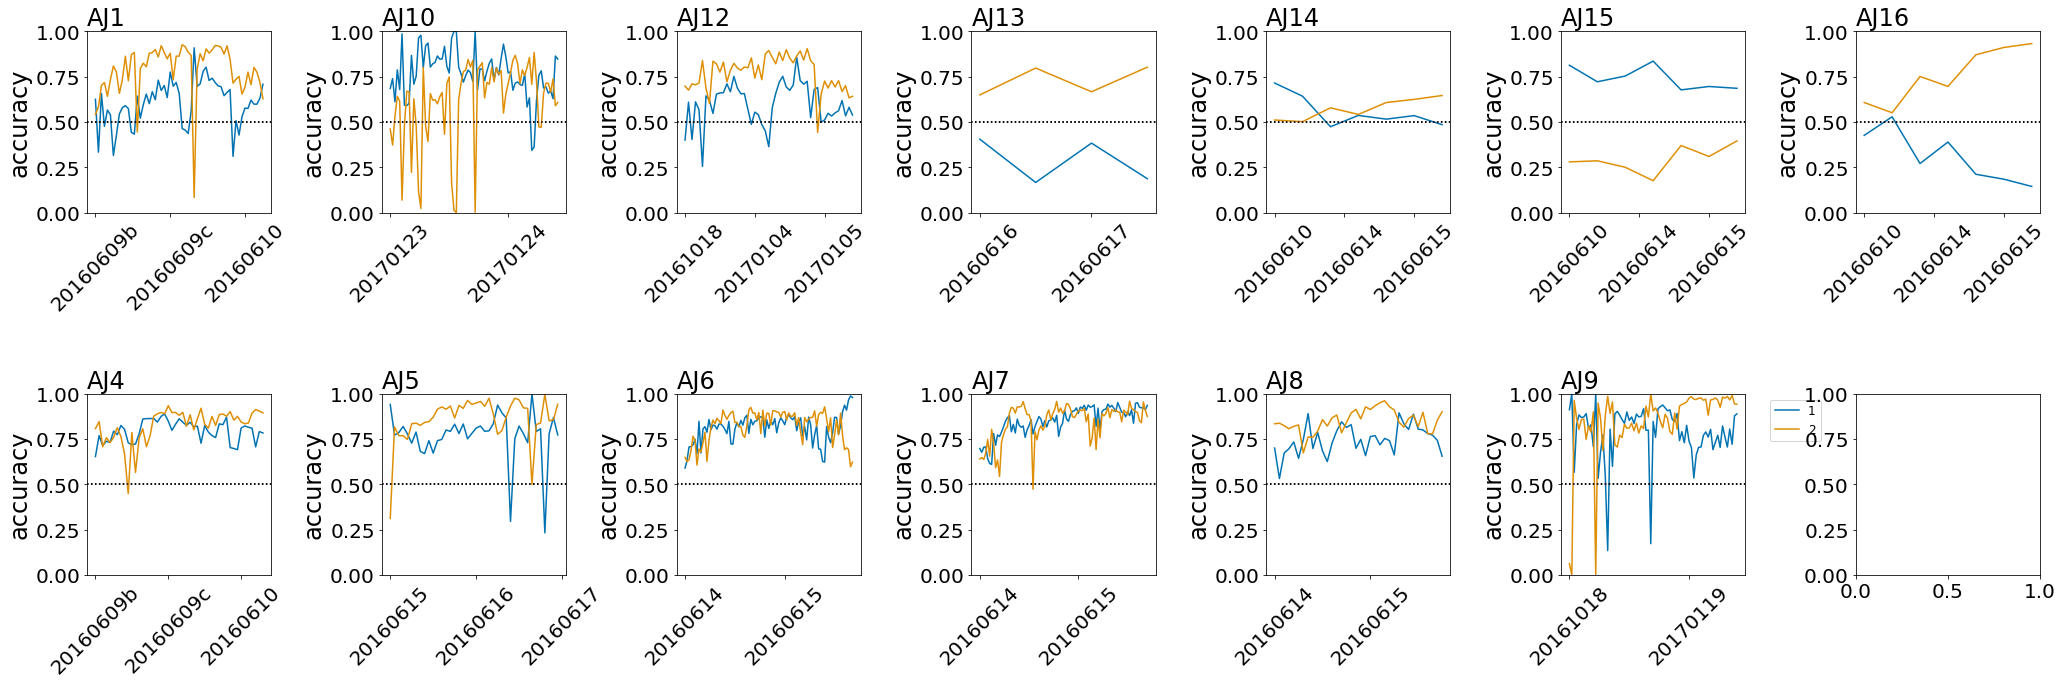

In [137]:
curr_colors = feature_colors['objectid']


tdf =  splitdf.copy()


for cohort in tdf['cohort'].unique(): #curr_cohort_list:
    nc, nr = figsz[cohort]
    print(nr, nc)
    fig, axes = pl.subplots(nr, nc, figsize=(nc*5,nr*5))
    for ax, (animalid, animaldf) in zip(axes.flat, tdf[tdf['cohort']==cohort].groupby(['animalid'])):
    
        for c_color, ((objectid), odf) in zip(curr_colors, animaldf.groupby(['objectid'])):

            xvs = [s for s, g in odf.groupby(['sessionid'])]
            xis = np.arange(0, len(xvs))

            yvs= [g['split_accuracy'].values[0] for s, g in odf.groupby(['sessionid'])]
            ax.plot(xis, yvs, color=c_color, label=objectid)

            ax.set_ylabel('accuracy')
            ax.set_ylim([0, 1])
            ax.axhline(y=0.5, linestyle=':', color='k')

            ax.set_xticklabels(xvs, rotation=45)
            #ax.tick_params(axis='x', rotation=45)

            ax.set_title(animalid, loc='left')
            ax.set_xticklabels(xvs, rotation=45)

    pl.subplots_adjust(hspace=1, wspace=0.6)
    ax.legend(bbox_to_anchor=(1.1, 1))
    
    figname = '_by-animal_split-accuracy_objectid_cohort-%s_all-transforms' % cohort
    pl.savefig(os.path.join(outdir, 'individuals', '%s.png' % figname))

## Plot stuff for single example animal

In [463]:
animalid = 'AK12'
axis_colors = {0: feature_colors['twinx'][0], 
               1:  feature_colors['twinx'][1]}


animaldf = perfdf[perfdf['animalid']==animalid] 
animaldf['train_day'] = [-1 for _ in np.arange(0, len(animaldf))]

animaldf_split = splitdf[splitdf['animalid']==animalid].copy()
animaldf_split['train_day'] = [-1 for _ in np.arange(0, len(animaldf_split))]

for (animalid), g in animaldf.groupby(['animalid']):
    sorted_sessions = list(sorted(g['sessionid'].unique(), key=util.natural_keys))
    sorted_session_ixs = [sorted_sessions.index(s) for s in g['sessionid']]
    animaldf.loc[g.index, 'train_day'] = sorted_session_ixs
    
for (animalid), g in animaldf_split.groupby(['animalid']):
    sorted_sessions = list(sorted(g['sessionid'].unique(), key=util.natural_keys))
    sorted_session_ixs = [sorted_sessions.index(s) for s in g['sessionid']]
    animaldf_split.loc[g.index, 'train_day'] = sorted_session_ixs
    

last_session_in_phase = [g.sort_values(by='train_day')['train_day'].values[0] for p, g in animaldf.groupby(['phase'])]
# last_session_in_phase


/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


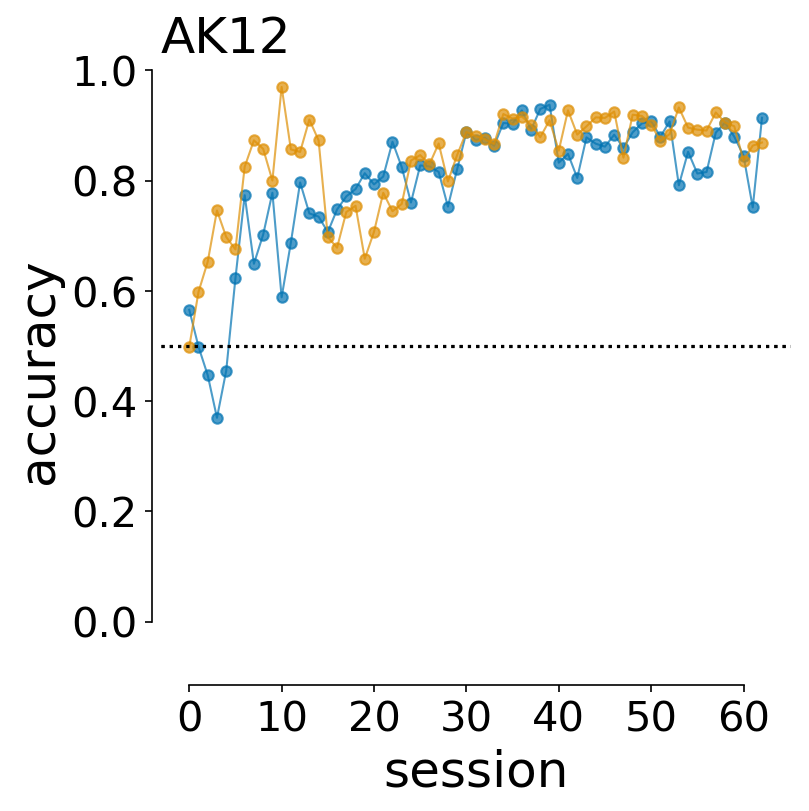

In [464]:
markersize=10
alpha=0.7
lw=1
marker='.'

curr_colors = feature_colors['objectid']
metric = 'split_accuracy'
fig, ax = pl.subplots(figsize=(7, 6), dpi=dpi)
for c_color, ((objectid), objectdf) in zip(curr_colors, animaldf_split.groupby(['objectid'])):

    session_list = [s for s, g in objectdf.groupby(['train_day'])]
    session_ixs = np.arange(0, len(session_list))
    xticks = [i for i in session_ixs if i%10==0]
    ax.set_xticks(xticks) #, rotation=45)
    ax.set_xticklabels(xticks) #, rotation=45)

    yvs= [g[metric].values[0] for s, g in objectdf.groupby(['train_day'])]
    ax.plot(session_ixs, yvs, color=c_color, label=objectid,
            marker=marker, lw=lw, alpha=alpha, markersize=markersize)

    ax.set_ylabel('accuracy')
    ax.set_ylim([0, 1])
    ax.axhline(y=0.5, linestyle=':', color='k')
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks)

    ax.set_title(animalid, loc='left')

# for phase_s in last_session_in_phase:
#     ax.axvline(x=phase_s, linestyle=':', color='k')
ax.set_ylim([-0.1, 1.01])

ax.set_xlabel('session')

pl.subplots_adjust(left=0.2, right=0.8, bottom=0.2)

sns.despine(offset=4, right=True, trim=True)

pl.savefig(os.path.join(outdir, 'individuals', 'split-accuracy_%s.svg' % animalid))


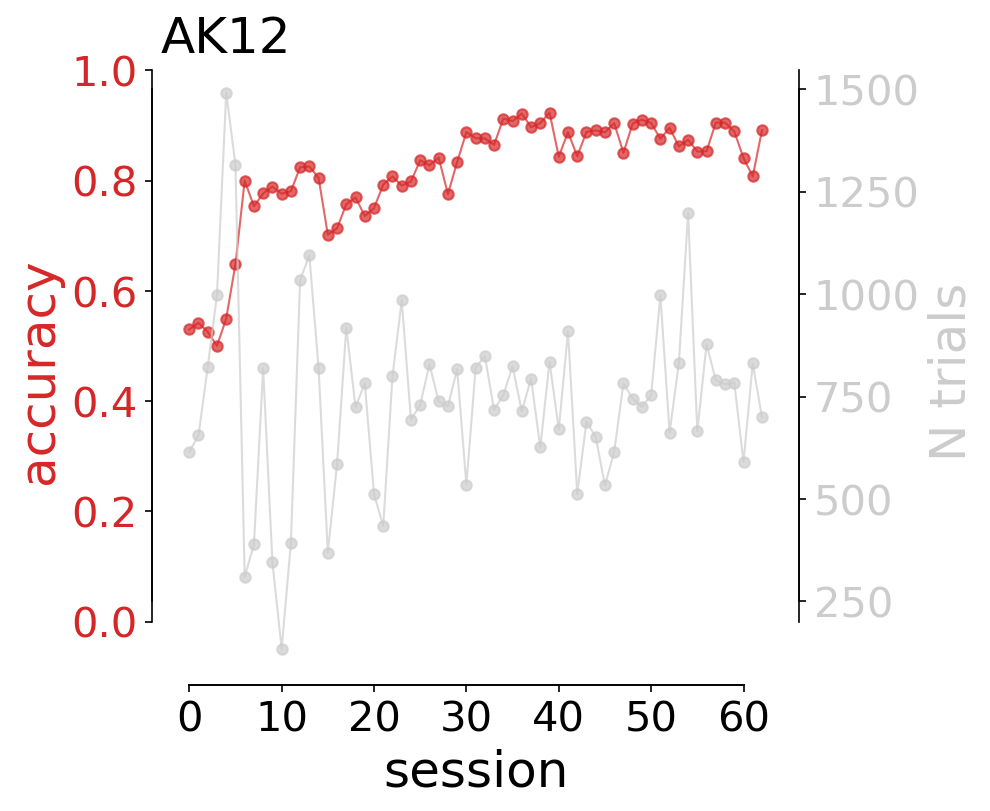

In [465]:

curr_colors = feature_colors['twinx']
curr_colors[1] = (0.8, 0.8, 0.8)

metric = 'overall_accuracy'

fig, ax = pl.subplots(figsize=(7, 6), dpi=dpi)
ax.set_title(animalid, loc='left')

session_list = [s for s, g in animaldf.groupby(['train_day'])]
session_ixs = np.arange(0, len(session_list))
xticks = [i for i in session_ixs if i%10==0]
ax.set_xticks(xticks) #, rotation=45)
ax.set_xticklabels(xticks) #, rotation=45)

yvs= [g[metric].values[0] for s, g in animaldf.groupby(['train_day'])]
ax.plot(session_ixs, yvs, color=curr_colors[0], 
                    marker=marker, lw=lw, alpha=alpha, markersize=markersize)

ax.tick_params(axis='y', labelcolor=curr_colors[0])
ax.set_ylabel('accuracy', color=curr_colors[0])
ax.set_ylim([-0.1, 1.01])
#ax.axhline(y=0.5, linestyle=':', color='r')

ax2 = ax.twinx()
yvs2 = [g['n_trials'].values[0] for s, g in animaldf.groupby(['train_day'])]
ax2.plot(session_ixs, yvs2, color=curr_colors[1], 
                     marker=marker, lw=lw, alpha=alpha, markersize=markersize)

ax2.tick_params(axis='y', labelcolor=curr_colors[1])
ax2.set_ylabel('N trials', color=curr_colors[1])

# for phase_s in last_session_in_phase:
#     ax.axvline(x=phase_s, linestyle=':', color='k')
ax.set_xlabel('session')

pl.subplots_adjust(left=0.2, right=0.8, bottom=0.2)
sns.despine(offset=4, right=False, trim=True)
pl.savefig(os.path.join(outdir, 'individuals', 'twinx_ntrials_accuracy_%s.svg' % animalid))


In [466]:
splitdf[splitdf['animalid']=='AK1'].iloc[-10:]


animalid  boxnum  boxpos cohort   mean_rt  n_trials  objectid  phase  \
132      AK1      16       2     AK  0.623646     348.0         1      5   
133      AK1      16       2     AK  0.732938     349.0         2      5   
134      AK1      16       2     AK  0.670965     181.0         1      5   
135      AK1      16       2     AK  0.765097     180.0         2      5   
136      AK1      16       2     AK  0.840844     452.0         1      5   
137      AK1      16       2     AK  0.831196     451.0         2      5   
138      AK1      16       2     AK  0.856279     390.0         1      5   
139      AK1      16       2     AK  0.885281     383.0         2      5   
140      AK1      16       2     AK  0.709383     338.0         1      5   
141      AK1      16       2     AK  0.760978     338.0         2      5   

     portmap   session sessionid  split_accuracy tower  
132        0  20171108  20171108        0.836207     3  
133        0  20171108  20171108        0.828080     3  
134        0  20180620  20180620        0.729282     3  
135        0  20180620  20180620        0.666667     3  
136        0  20180622  20180622        0.889381     3  
137        0  20180622  20180622        0.614191     3  
138        0  20180623  20180623        0.876923     3  
139        0  20180623  20180623        0.775457     3  
140        0  20180624  20180624        0.914201     3  
141        0  20180624  20180624        0.781065     3

# Visualize all animals

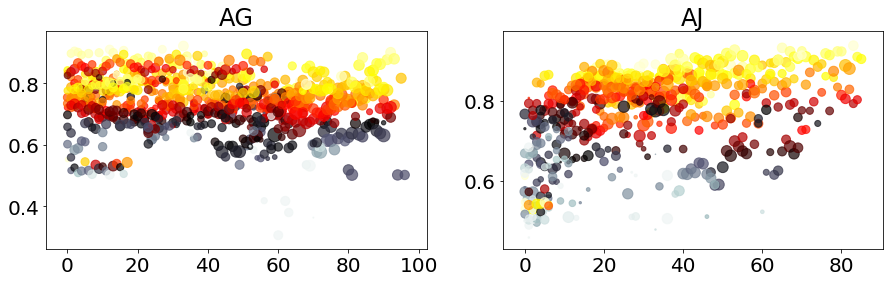

In [138]:
fig, axes = pl.subplots(1, len(cohort_list), figsize=(15, 4))

for (cohort, animalid), g in perfdf.groupby(['cohort', 'animalid']):
    axi = cohort_list.index(cohort)
    ax = axes[axi]
    
    session_list = [s for s, sg in g.sort_values(by='sessionid').groupby(['sessionid'])]
    mean_acc = [sg['overall_accuracy'].values[0] for s, sg in g.sort_values(by='sessionid').groupby(['sessionid'])]
    
    ntrials = [sg['n_trials'].values[0]/10. for s, sg in g.sort_values(by='sessionid').groupby(['sessionid'])]

    ax.scatter(np.arange(0, len(session_list)), mean_acc, c=mean_acc, cmap=pnas_cmap,
               s=ntrials, label=animalid, alpha=0.7)
    ax.set_title(cohort)


19 out of 24 animals with accuracy >= 0.70
('5 did not learn:', ['AG3', 'AJ13', 'AJ14', 'AJ15', 'AJ16'])


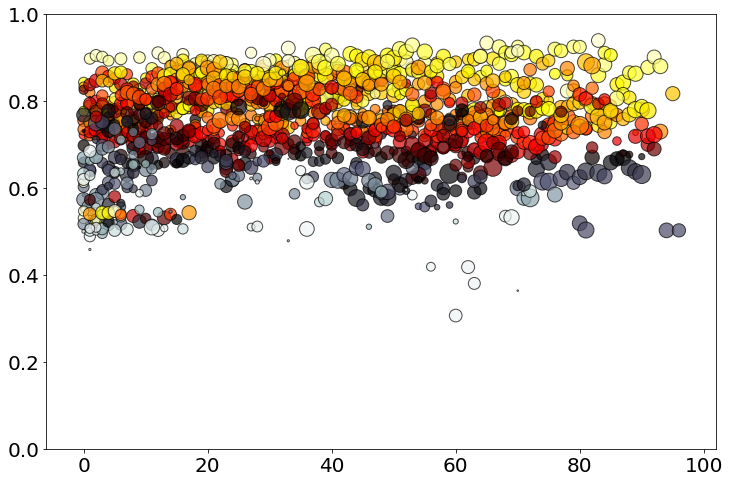

In [139]:
accuracies = {} # []
fig, ax = pl.subplots(figsize=(12, 8))

for (cohort, animalid), g in perfdf.groupby(['cohort', 'animalid']):
    
    session_list = [s for s, sg in g.sort_values(by='session').groupby(['sessionid'])]
    mean_acc = [sg['overall_accuracy'].values[0] for s, sg in g.sort_values(by='session').groupby(['sessionid'])]
    
    ntrials = [sg['n_trials'].values[0]/5. for s, sg in g.sort_values(by='session').groupby(['sessionid'])]
    
    accuracies.update({animalid: mean_acc})
    
    ax.scatter(np.arange(0, len(session_list)), mean_acc, c=mean_acc, cmap=pnas_cmap,
               s=ntrials, label=animalid, alpha=0.7, edgecolors='k')
    #ax.set_title(cohort)
    
ax.set_ylim([0, 1])

# Print sumamry
thr = 0.7
curr_animal_ids = perfdf['animalid'].unique()
animals_learned = perfdf[perfdf['overall_accuracy'] >= thr]['animalid'].unique()
print("%i out of %i animals with accuracy >= %.2f" % (len(animals_learned), len(curr_animal_ids), thr))
animals_didnt_learn = [i for i in curr_animal_ids if i not in animals_learned]

print("%i did not learn:" % len(animals_didnt_learn), animals_didnt_learn)


# Visualze all performance, sort sessions

In [140]:
max_nsessions = max([len(v) for k, v in accuracies.items()])
print(max_nsessions)

session_counts = dict((k, len(v)) for k, v in accuracies.items())

sorted_session_counts = [k for k, v in sorted(session_counts.items(), key=lambda x: x[1])][::-1] # np.argsort(session_counts)[::-1]


97


In [141]:
perfdf[perfdf.animalid=='AK4'].sort_values(by='session')[-10:]

Empty DataFrame
Columns: [animalid, boxnum, boxpos, cohort, mean_rt, n_trials, overall_accuracy, phase, portmap, session, sessionid, tower]
Index: []

In [142]:
#### Create array to plot as heatmap
performance_mat = np.empty((len(curr_animal_ids), max_nsessions))
for ai, animalid in enumerate(sorted_session_counts):
    vals = accuracies[animalid]
    xvpad = np.pad(vals, ((0, max_nsessions-len(vals))), mode='constant', constant_values=np.nan)

    performance_mat[ai, :] = xvpad

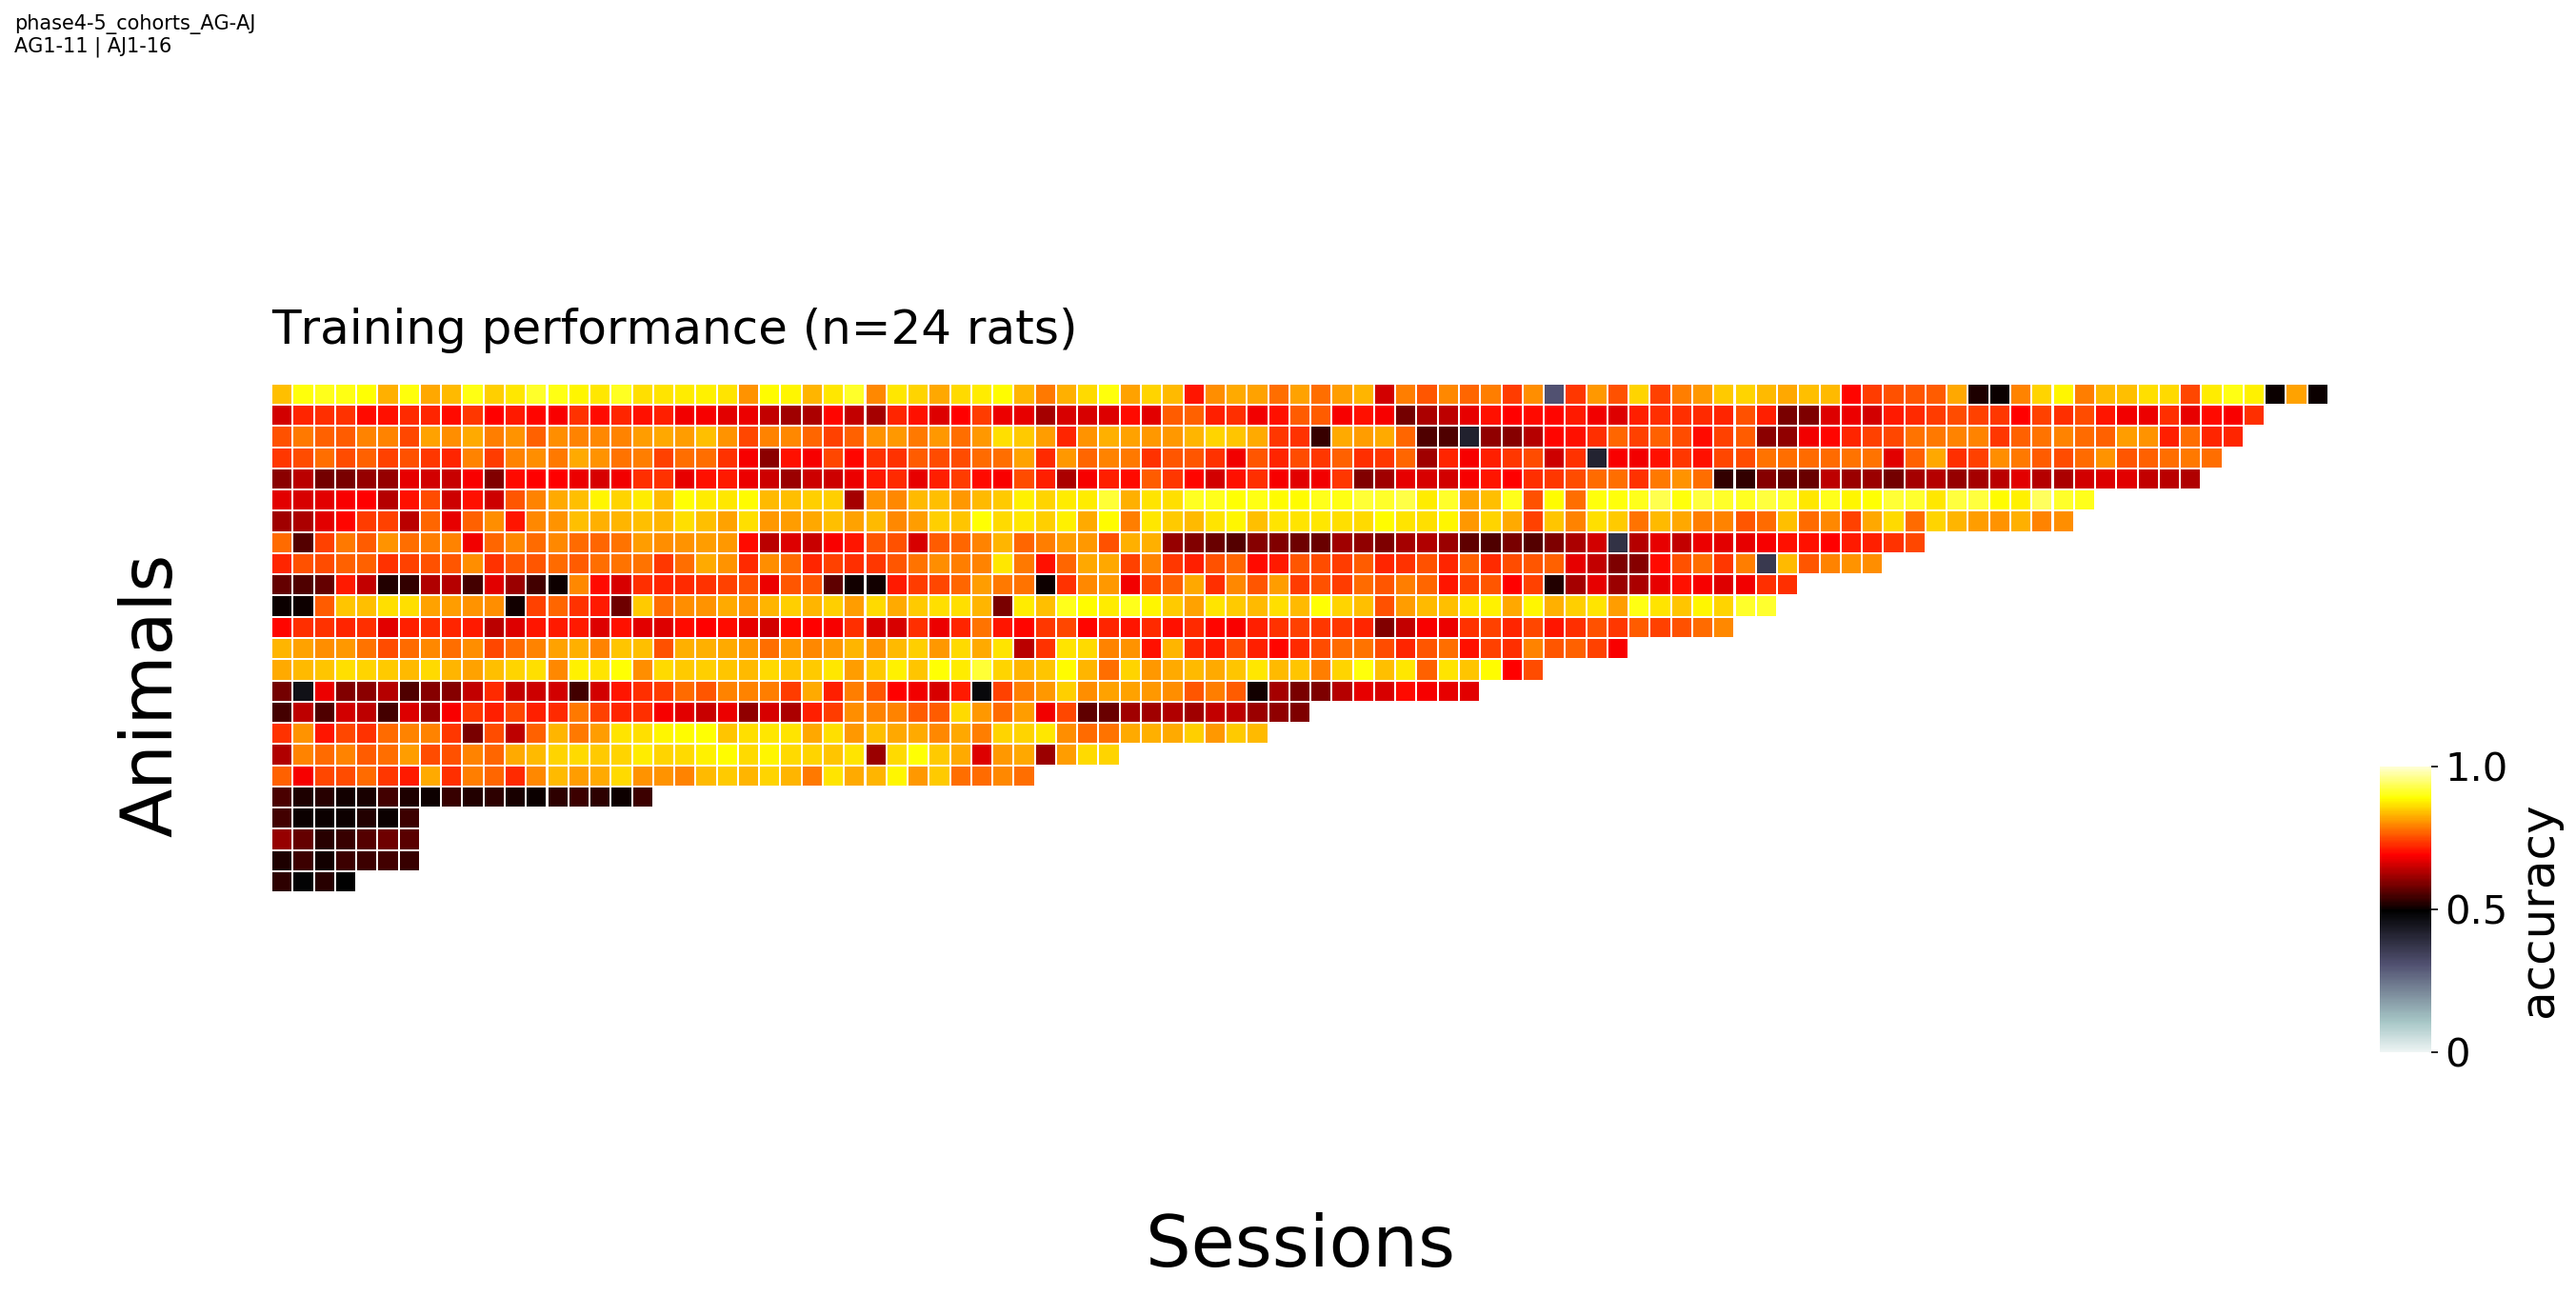

In [143]:
#### Plot performance array
fig, ax =pl.subplots(figsize=(18,10), dpi=dpi)
cbar_ax = fig.add_axes([.92, .25, .02, .2])
fig.patch.set_alpha(0.)
sns.heatmap(performance_mat, cmap=pnas_cmap, vmin=0, vmax=1, linewidths=0.5, square=True,
           cbar_ax=cbar_ax, cbar=1, ax=ax,
           cbar_kws=dict(ticks=[0, .5, 1.0]))
ax.tick_params(axis='x', size=0)
ax.axis('off')

pl.subplots_adjust(left=0.1, right=0.9, bottom=0.2)
ax.set_title('Training performance (n=%i rats)' % performance_mat.shape[0], loc='left', pad=20)

fig.text(0.5, 0.1, 'Sessions', ha='center', fontsize=36)
fig.text(0.04, 0.5, 'Animals', va='center', rotation='vertical', fontsize=36)

#cbar_ax.yaxis.label.set_size(20)
cbar_ax.set_yticklabels([0, 0.5, 1.0], fontsize=20) #(20)
cbar_ax.set_ylabel('accuracy', fontsize=24) #(20)

fig.text(0, 0.95, figid)
pl.savefig(os.path.join(outdir, '_heatmap_by_session_sorted.png'))
pl.savefig(os.path.join(outdir, '_heatmap_by_session_sorted.svg'))

In [480]:
df['size'].unique()

array([40. , 37.5, 35. , 32.5, 30. , 27.5, 25. , 22.5, 20. , 17.5, 15. ,
       12.5, 10. ])

In [481]:
df['depth_rotation'].unique()

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        -5, -10, -15, -20, -25, -30, -35, -40, -45, -50, -55, -60])

In [145]:
no_feedback_flag

True

In [153]:
row_feature = 'size'
col_feature = 'depth_rotation'

row_values = sorted(df[row_feature].unique())

col_values = sorted(df[col_feature].unique())
feature_list = [row_feature, col_feature]

In [156]:
any(p in [4, 5] for p in phase_list)

True

In [159]:
splitdf.shape #.shape

(2800, 13)

In [222]:
object_ids = df['object'].unique()
HMAPS = dict((animalid, dict((k, []) for k in object_ids)) for animalid in df['animalid'].unique())
no_feedback = {}

dlist = []

i=0
for (animalid, session, sfx), agroup in df.groupby(['animalid', 'session', 'suffix']):
    
    if any(p in [4, 5] for p in phase_list) and no_feedback_flag is True:
        no_fb = agroup[agroup['no_feedback']==True][feature_list]
        no_fb_configs = list(set([(s, d) for s, d, in zip(no_fb[row_feature].values, no_fb[col_feature].values)]))
        no_feedback[animalid] = no_fb_configs

    for objectname, ogroup in agroup.groupby(['object']):
        hmap = np.ones((len(row_values), len(col_values))) * np.nan

        for (drot, sz), sgroup in ogroup.groupby([col_feature, row_feature]):

            n_trials = float(sgroup['outcome'].shape[0])
            perc_correct = len(sgroup[sgroup['outcome']=='success']) / n_trials
            mean_rt = sgroup['response_time'].mean()

            r_ix = list(row_values).index(sz)
            c_ix = list(col_values).index(drot)

            hmap[r_ix, c_ix] = perc_correct

            dlist.append(pd.DataFrame({'perc_correct': perc_correct,
                                       'avg_rt': mean_rt,
                                          'n_trials': n_trials,
                                          '%s' % row_feature: sz,
                                          '%s' % col_feature: drot,
                                          'objectid': objectname,
                                          'animalid': animalid,
                                          'session': session,
                                          'suffix': sfx,
                                        'phase': sgroup['phase'].unique()[0]}, index=[i]))
            i+=1

        HMAPS[animalid][objectname].append(hmap)

heatdf = pd.concat(dlist, axis=0)       

for animalid, hmap_d in HMAPS.items():
    HMAPS[animalid] = dict((k, np.dstack(v)) for k, v in hmap_d.items())


# Plot

In [161]:
# font_params = {'legend.fontsize': 'large',
#                  'axes.labelsize': 'large',
#                  'axes.titlesize': 'large',
#                  'xtick.labelsize': 'large',
#                  'ytick.labelsize': 'large'}

plotting.update_fonts(labelsize=24)

dpi=150
lw = 5


# Set current output dir for figures

In [163]:
outdir

'/n/coxfs01/behavior-data/threeport/processed/basic-training/pnas-style'

In [170]:
phase_str = 'phase-%s' % '-'.join([str(p) for p in phase_list])
print(phase_str)

phase-4-5


##### Test HEATMAP w/ 1 animal

In [173]:
animalid

'AG1'

In [175]:
no_feedback

{'AG1': [],
 'AG10': [],
 'AG11': [],
 'AG2': [(20.0, 45),
  (25.0, 30),
  (20.0, 30),
  (25.0, 45),
  (25.0, 15),
  (20.0, 15)],
 'AG3': [],
 'AG4': [(25.0, -15),
  (20.0, -30),
  (25.0, -45),
  (20.0, -45),
  (25.0, -30),
  (20.0, -15)],
 'AG5': [(25.0, -15),
  (20.0, -30),
  (25.0, -45),
  (20.0, -45),
  (25.0, -30),
  (20.0, -15)],
 'AG6': [],
 'AG7': [(25.0, -15),
  (20.0, -30),
  (25.0, -45),
  (20.0, -45),
  (25.0, -30),
  (20.0, -15)],
 'AG8': [(20.0, 45),
  (25.0, 30),
  (20.0, 30),
  (25.0, 45),
  (25.0, 15),
  (20.0, 15)],
 'AG9': [],
 'AJ1': [(20.0, 45),
  (25.0, 30),
  (20.0, 30),
  (25.0, 45),
  (25.0, 15),
  (20.0, 15)],
 'AJ10': [],
 'AJ12': [],
 'AJ13': [],
 'AJ14': [],
 'AJ15': [],
 'AJ16': [],
 'AJ4': [(25.0, -15),
  (20.0, -30),
  (25.0, -45),
  (20.0, -45),
  (25.0, -30),
  (20.0, -15)],
 'AJ5': [(25.0, -15),
  (20.0, -30),
  (25.0, -45),
  (20.0, -45),
  (25.0, -30),
  (20.0, -15)],
 'AJ6': [],
 'AJ7': [],
 'AJ8': [(25.0, -15),
  (20.0, -30),
  (25.0, -45),
  (20.

In [189]:
animals_nofeedback = [k for k, v in no_feedback.items() if len(v)>0]

In [181]:
cohort = re.findall(r'(\D+)', animalid)[0]
print(cohort)
defaults = ph.get_default_params(cohort)


AG


_annot_heatmap_split-object_phase-4-5_AG2


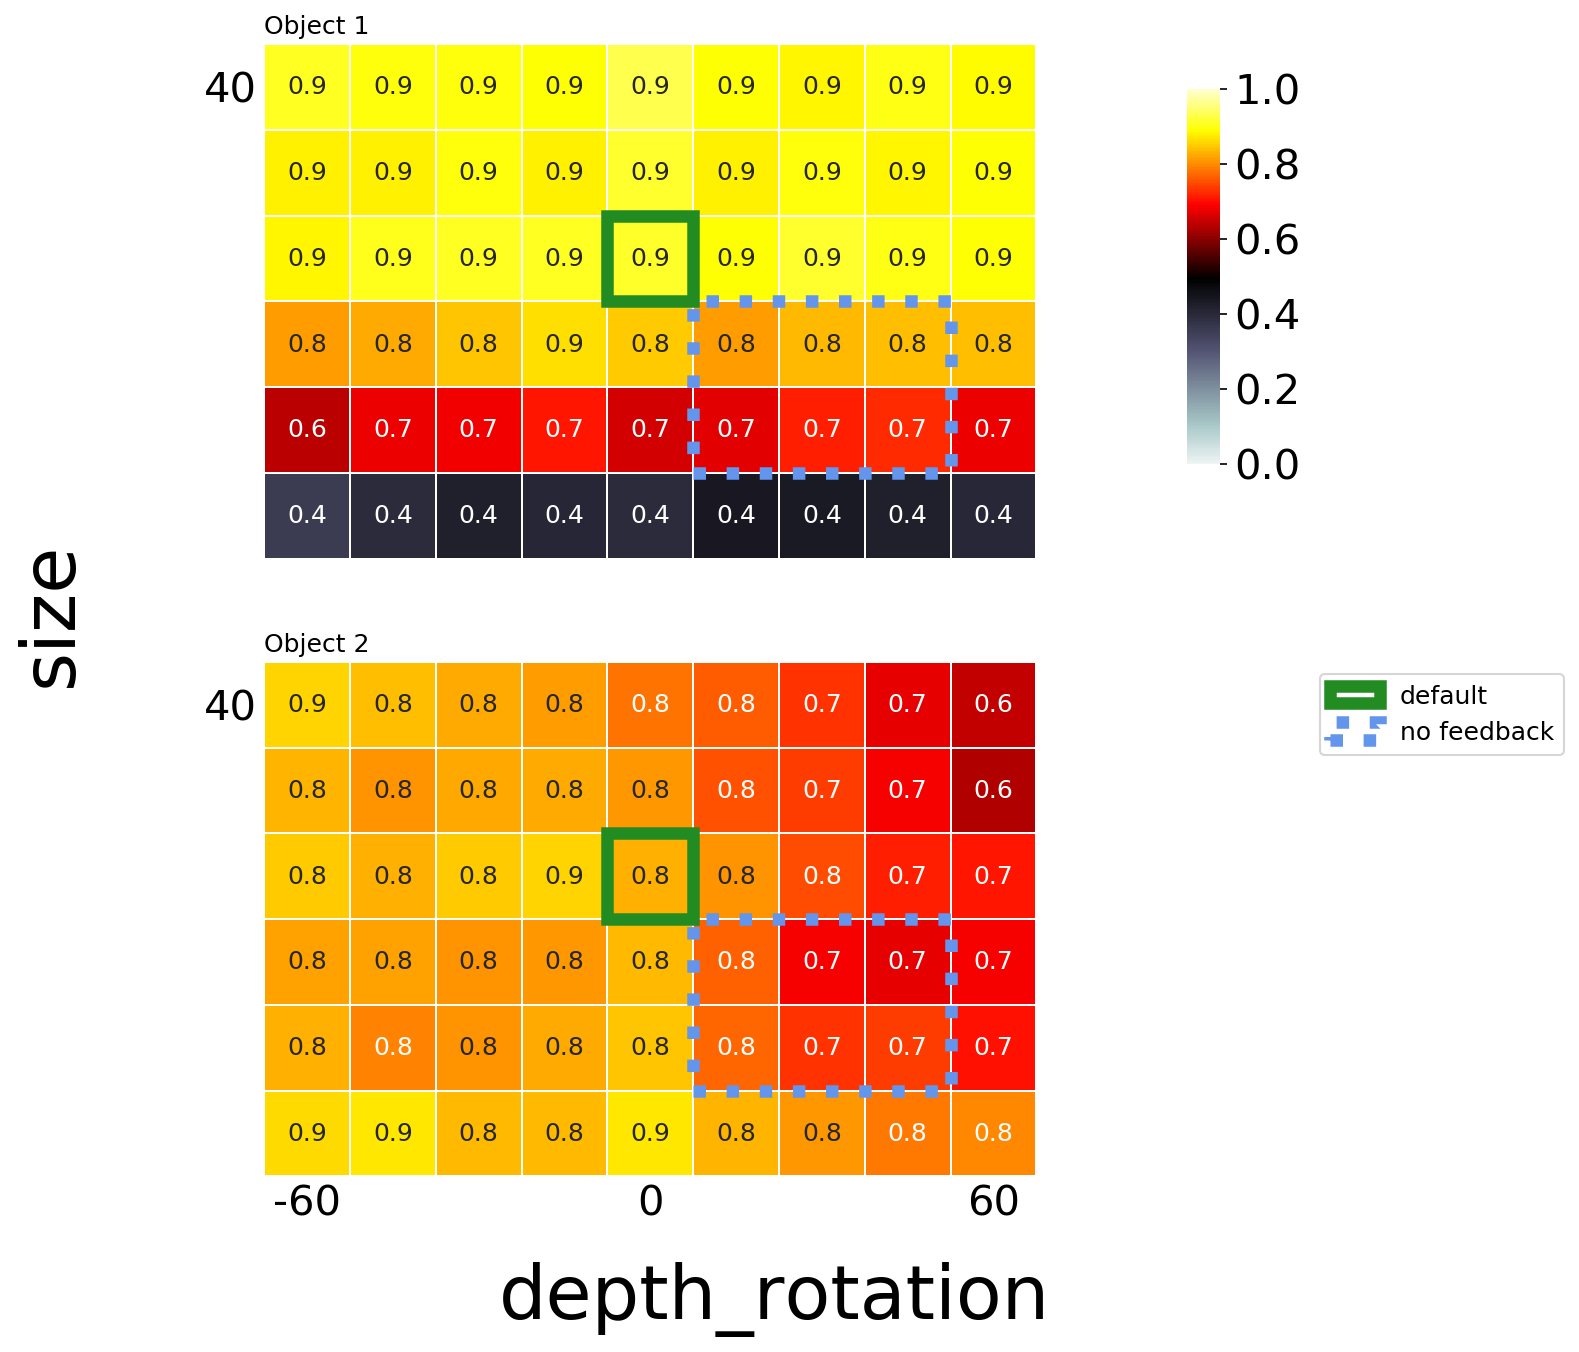

In [188]:
lw = 0.5
lc = 'w'
annot=True


if no_feedback_flag:
    curr_no_fb = no_feedback[animalid]
else:
    curr_no_fb = None
    
fw = min([ int(round(len(col_values)*1.2)), 16])
fh = len(object_ids)*5

annot_str = '_annot_' if annot else ''

fig, axes = pl.subplots(2, 1, figsize=(fw, fh), 
                        dpi=dpi, sharex=True, sharey=True)
fig.patch.set_alpha(0)

cbar_ax = fig.add_axes([0.75, 0.6, 0.02, 0.25])

hmap_d = HMAPS[animalid]
for oi, objectid in enumerate(object_ids):
    ax = axes[oi]
    hmap = np.nanmean(hmap_d[objectid], axis=-1)
    im = sns.heatmap(hmap, cmap=pnas_cmap, vmin=0, vmax=1, ax=ax,
                    cbar=oi==0, cbar_ax=0 if oi else cbar_ax, center=0.5, linewidths=lw, linecolor=lc,
                     annot=annot, fmt=".1f",  annot_kws={"size": 12})

    plotting.format_size_depth_ticks(ax, xvals=col_values, yvals=row_values, seaborn=True) #xmax=xmax, ymax=ymax, 
    if curr_no_fb is not None:
        plotting.draw_no_feedback(ax, curr_no_fb, defaults, seaborn=True, lw=6)

    if annot:
        ax.set_title('Object %s' % objectid, fontsize=12, loc='left', pad=5)
    ax.tick_params(axis='both', size=0)

    ax.set_aspect('equal')
    ax.invert_yaxis()

if curr_no_fb is not None:
    ax.legend(bbox_to_anchor=(1.7, 1))

pl.subplots_adjust(hspace=0.2, wspace=0.1, right=0.7, left=0.15)

fig.text(0.5, 0.03, col_feature, ha='center', fontsize=36)
fig.text(0.04, 0.5, row_feature, va='center', rotation='vertical', fontsize=36)

figname = '%sheatmap_split-object_%s_%s' % (annot_str, phase_str, animalid)
print(figname)

pl.savefig(os.path.join(outdir, 'individuals', '%s.svg' % figname))
#pl.savefig(os.path.join(curr_outdir, 'individuals', '%s.png' % figname))


In [191]:
outdir

'/n/coxfs01/behavior-data/threeport/processed/basic-training/pnas-style'

## Plot HEATMAP for all animals

In [190]:
plot_each_animal = True
# transform_str = 'inplane_rotations' if curr_phase==6 else 'indepth_rotations'

#curr_outdir = os.path.join(processed_dir, 'performance', transform_str) #, 'by_animal')


AJ
_annot_heatmap_split-object_phase-4-5_AJ8
AJ
_annot_heatmap_split-object_phase-4-5_AJ1
AJ
_annot_heatmap_split-object_phase-4-5_AJ4
AJ
_annot_heatmap_split-object_phase-4-5_AJ5
AG
_annot_heatmap_split-object_phase-4-5_AG8
AG
_annot_heatmap_split-object_phase-4-5_AG7
AG
_annot_heatmap_split-object_phase-4-5_AG5
AG
_annot_heatmap_split-object_phase-4-5_AG4
AG
_annot_heatmap_split-object_phase-4-5_AG2


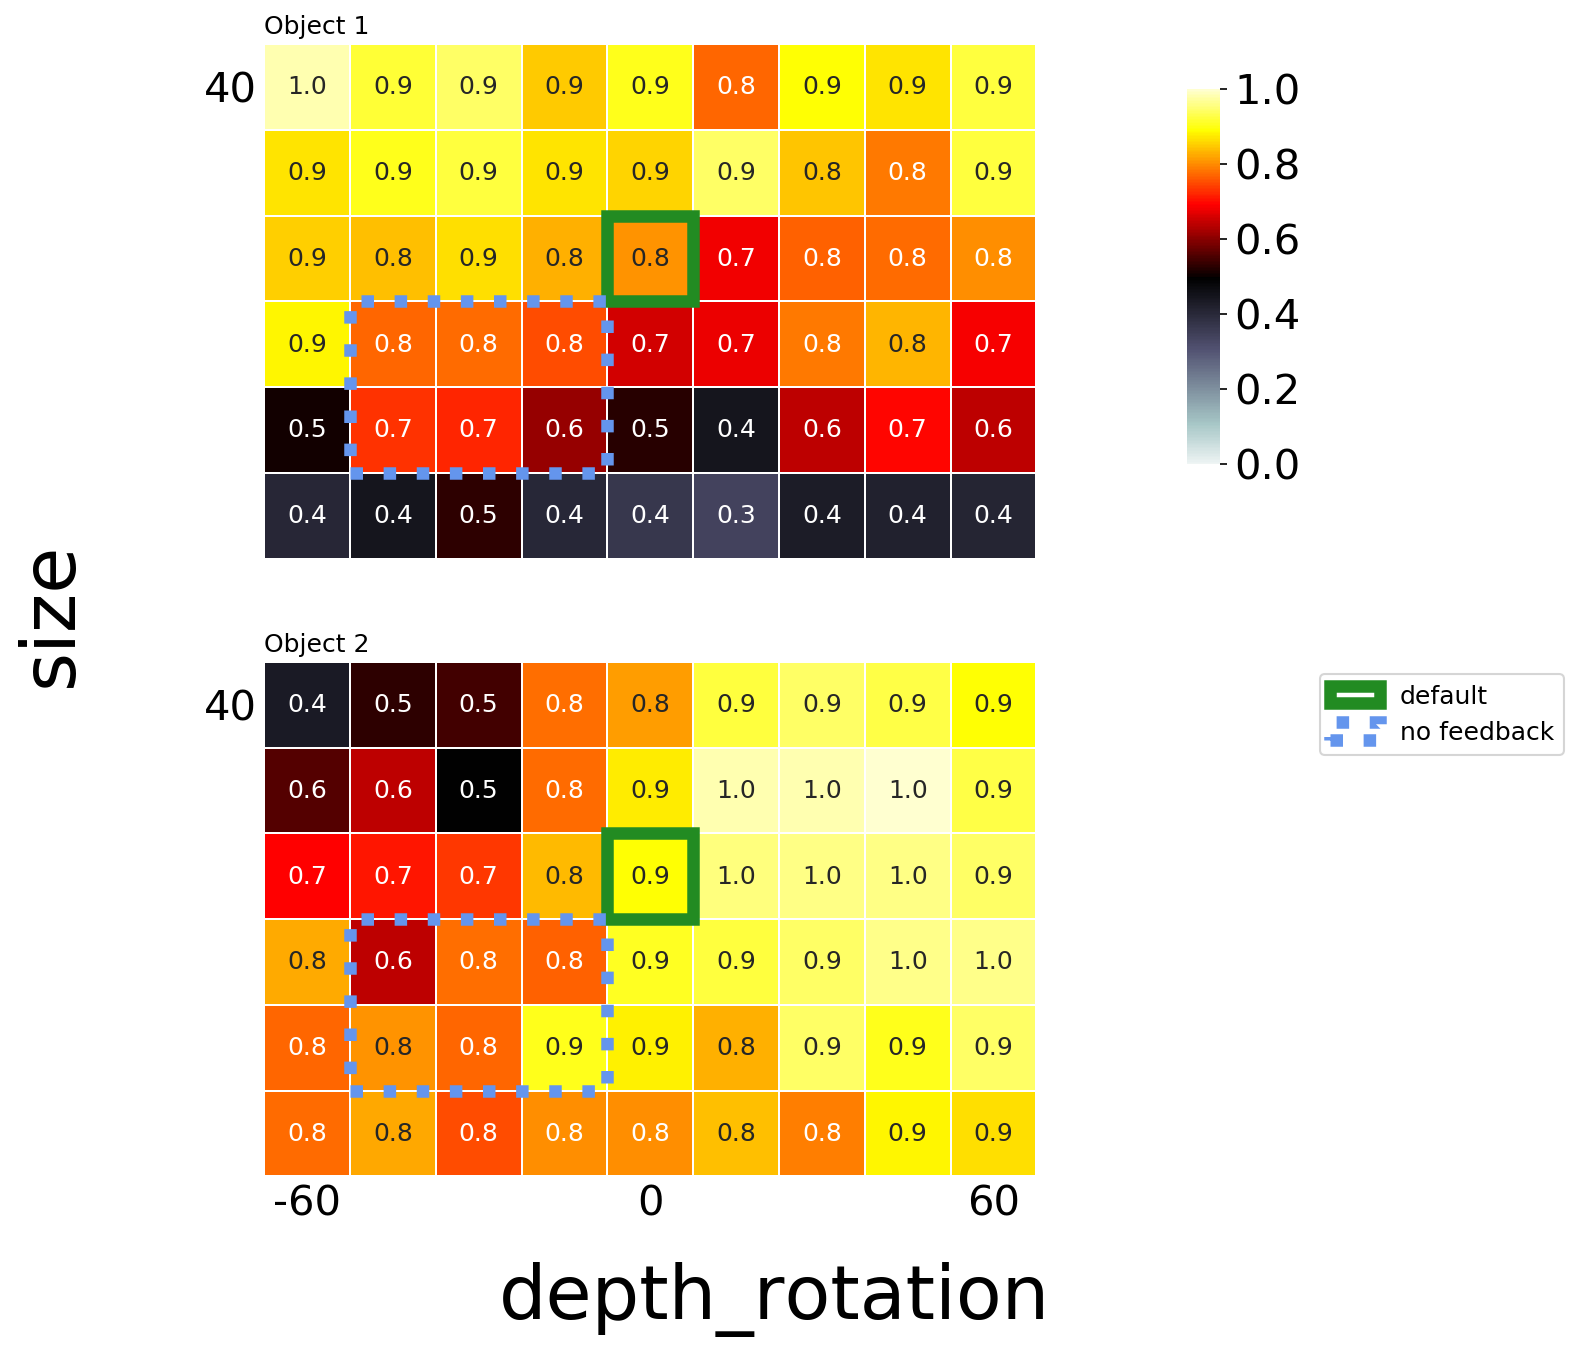

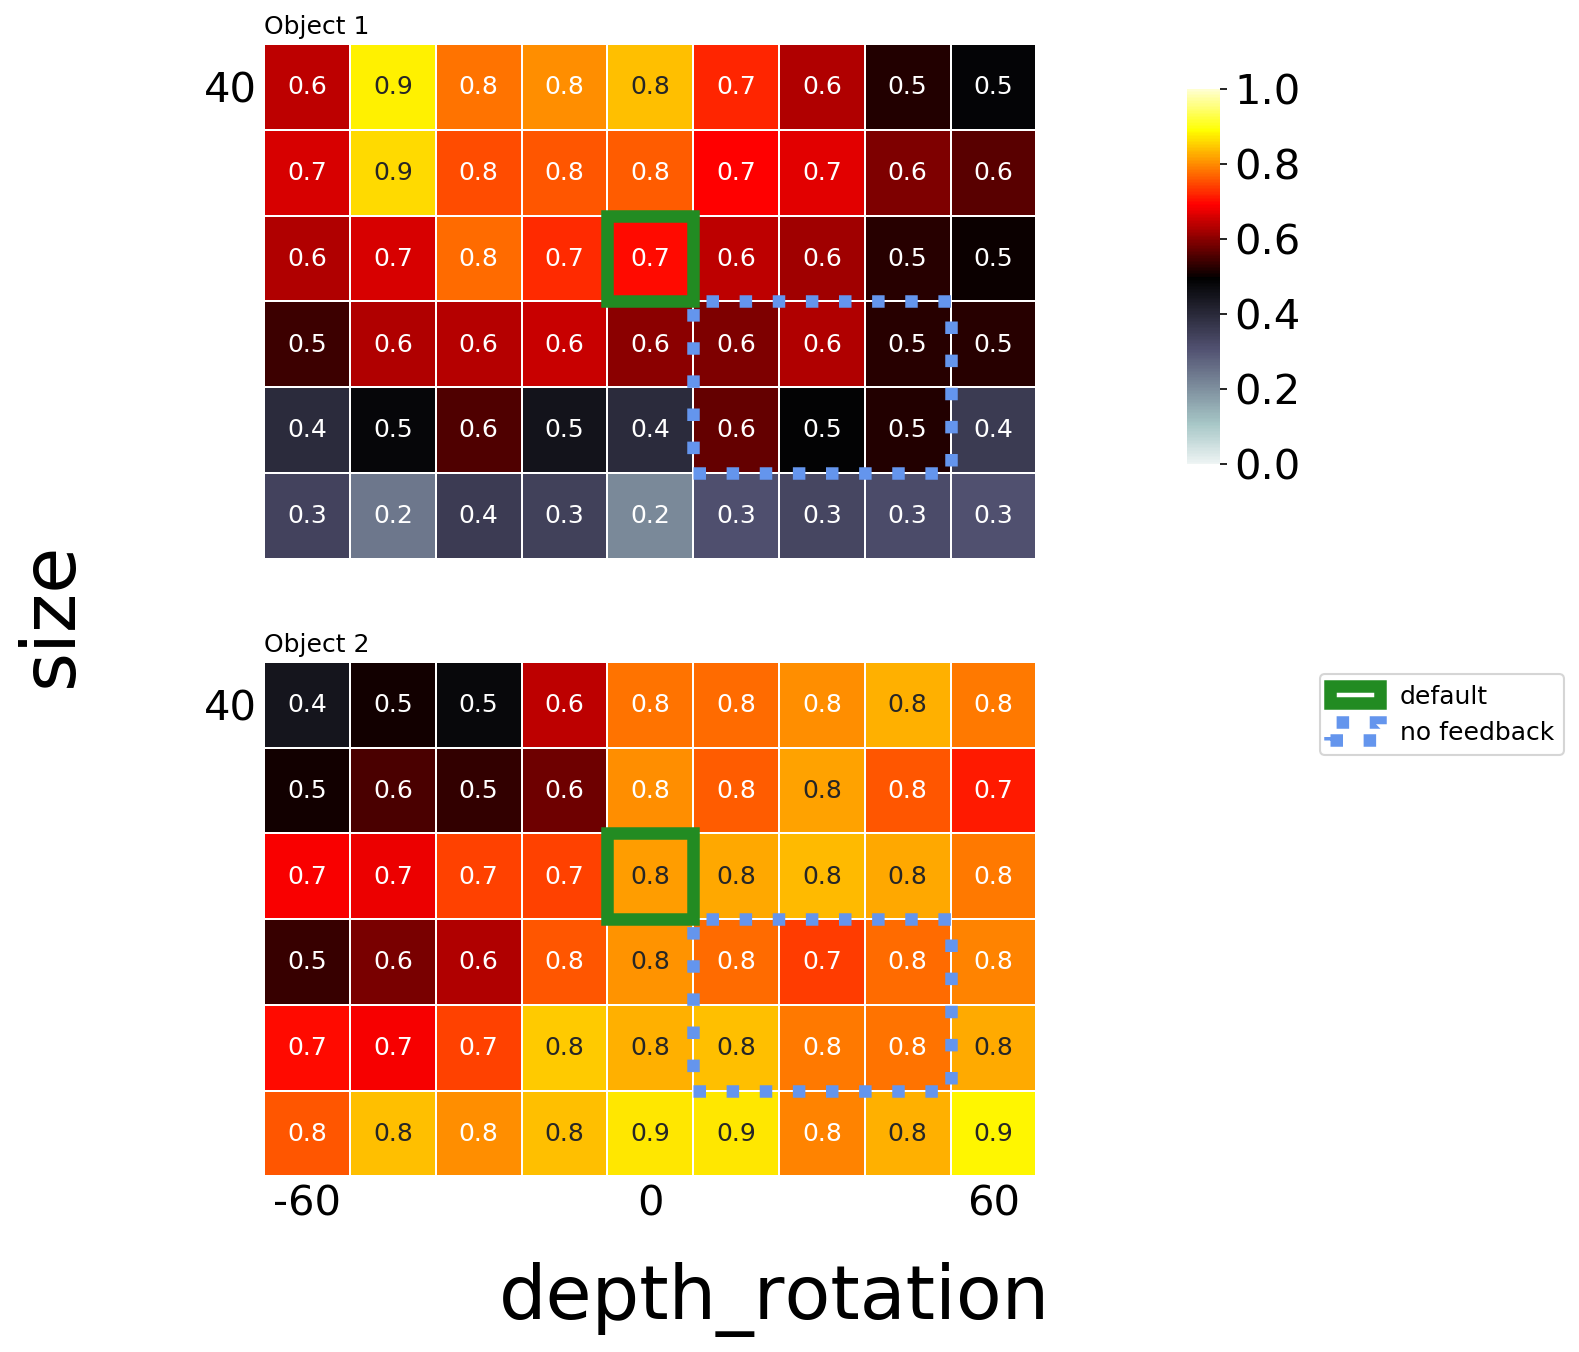

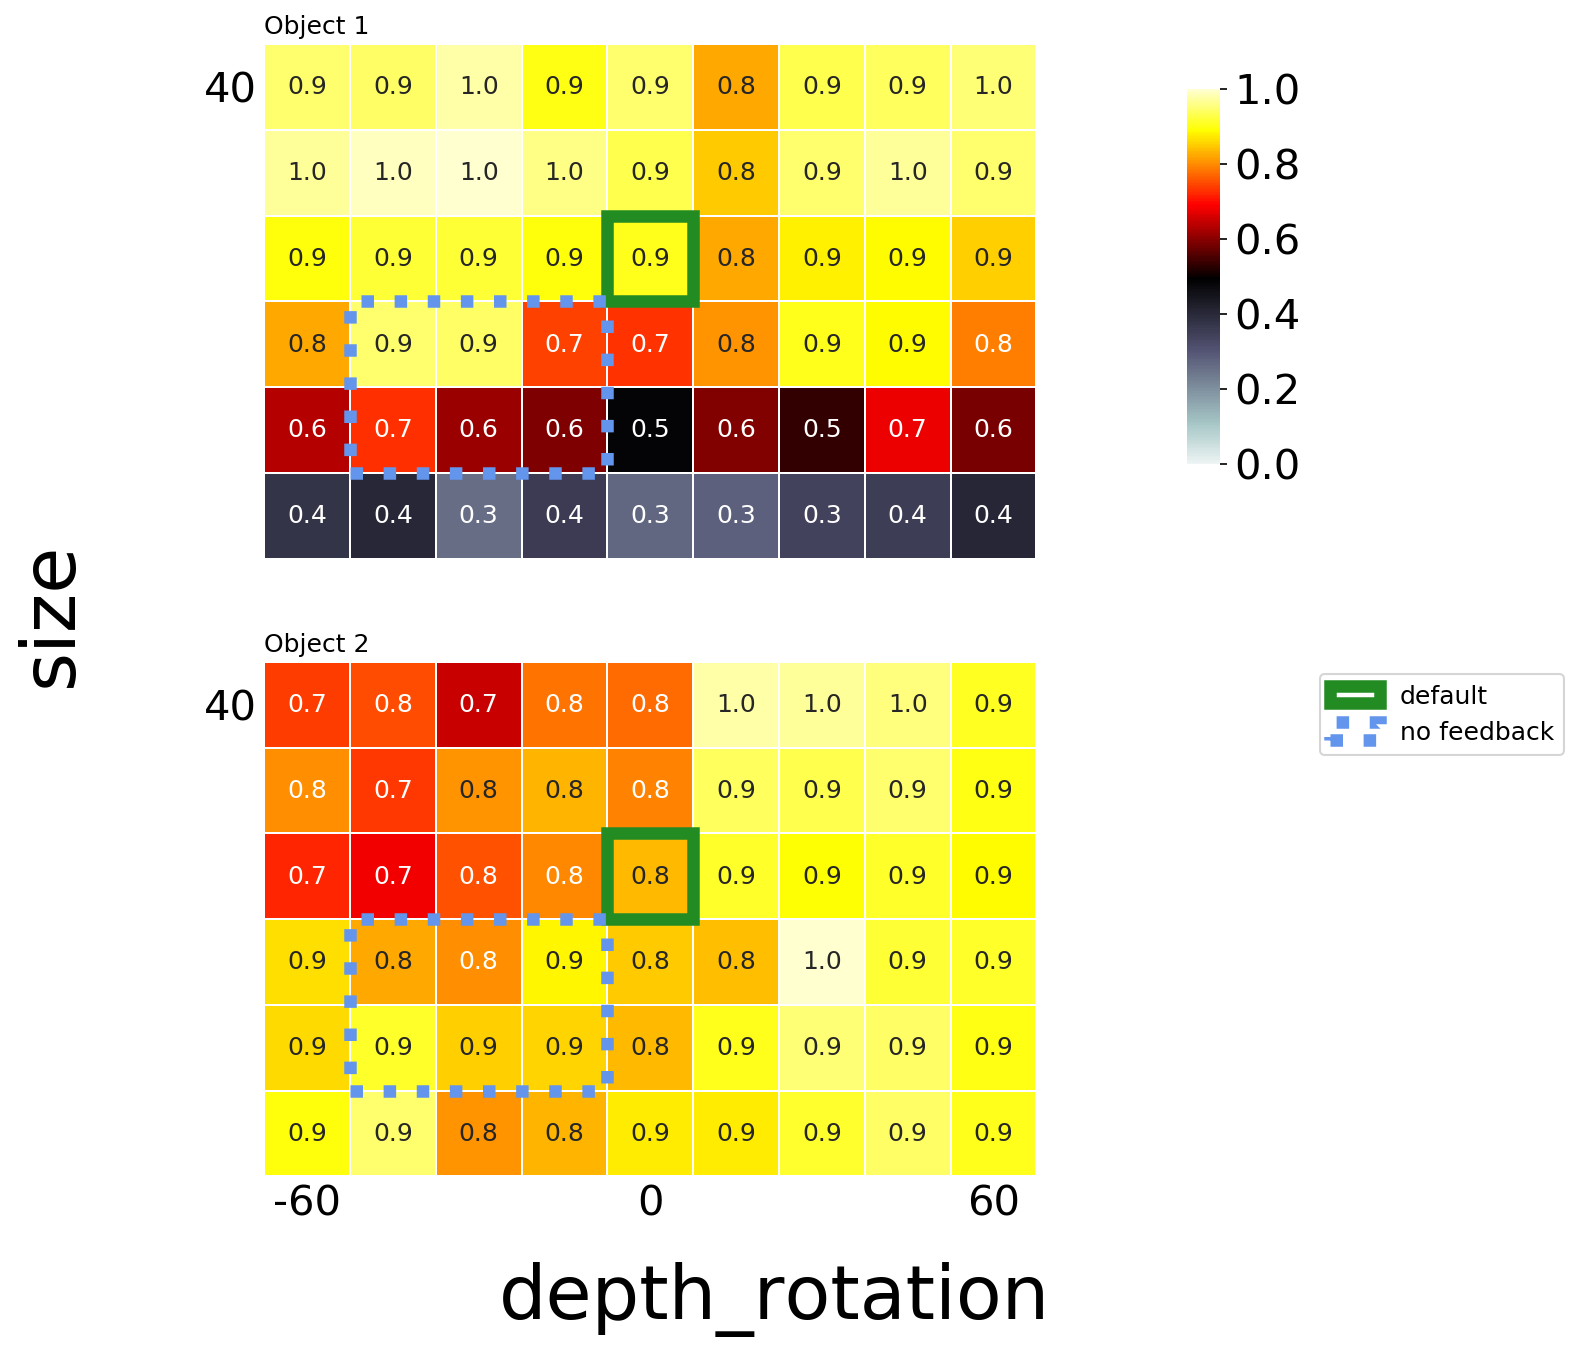

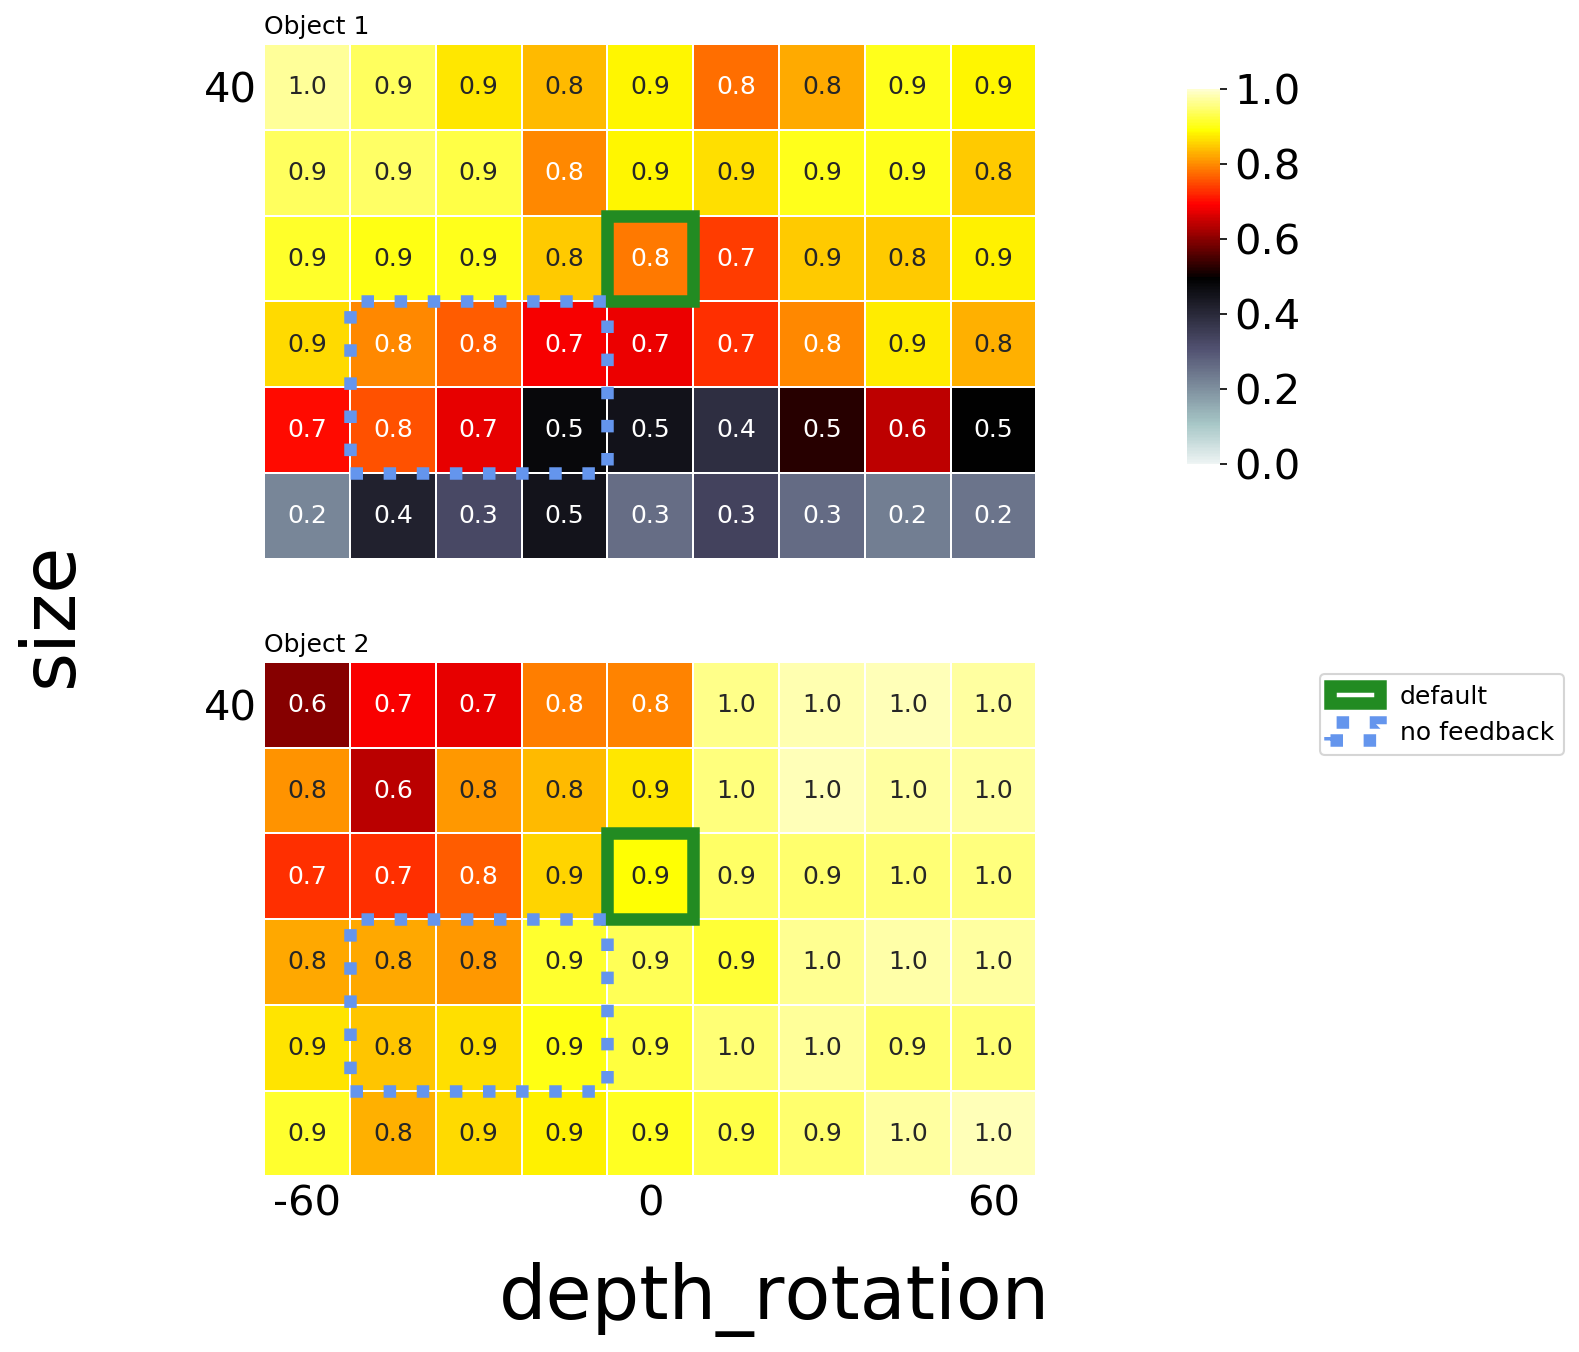

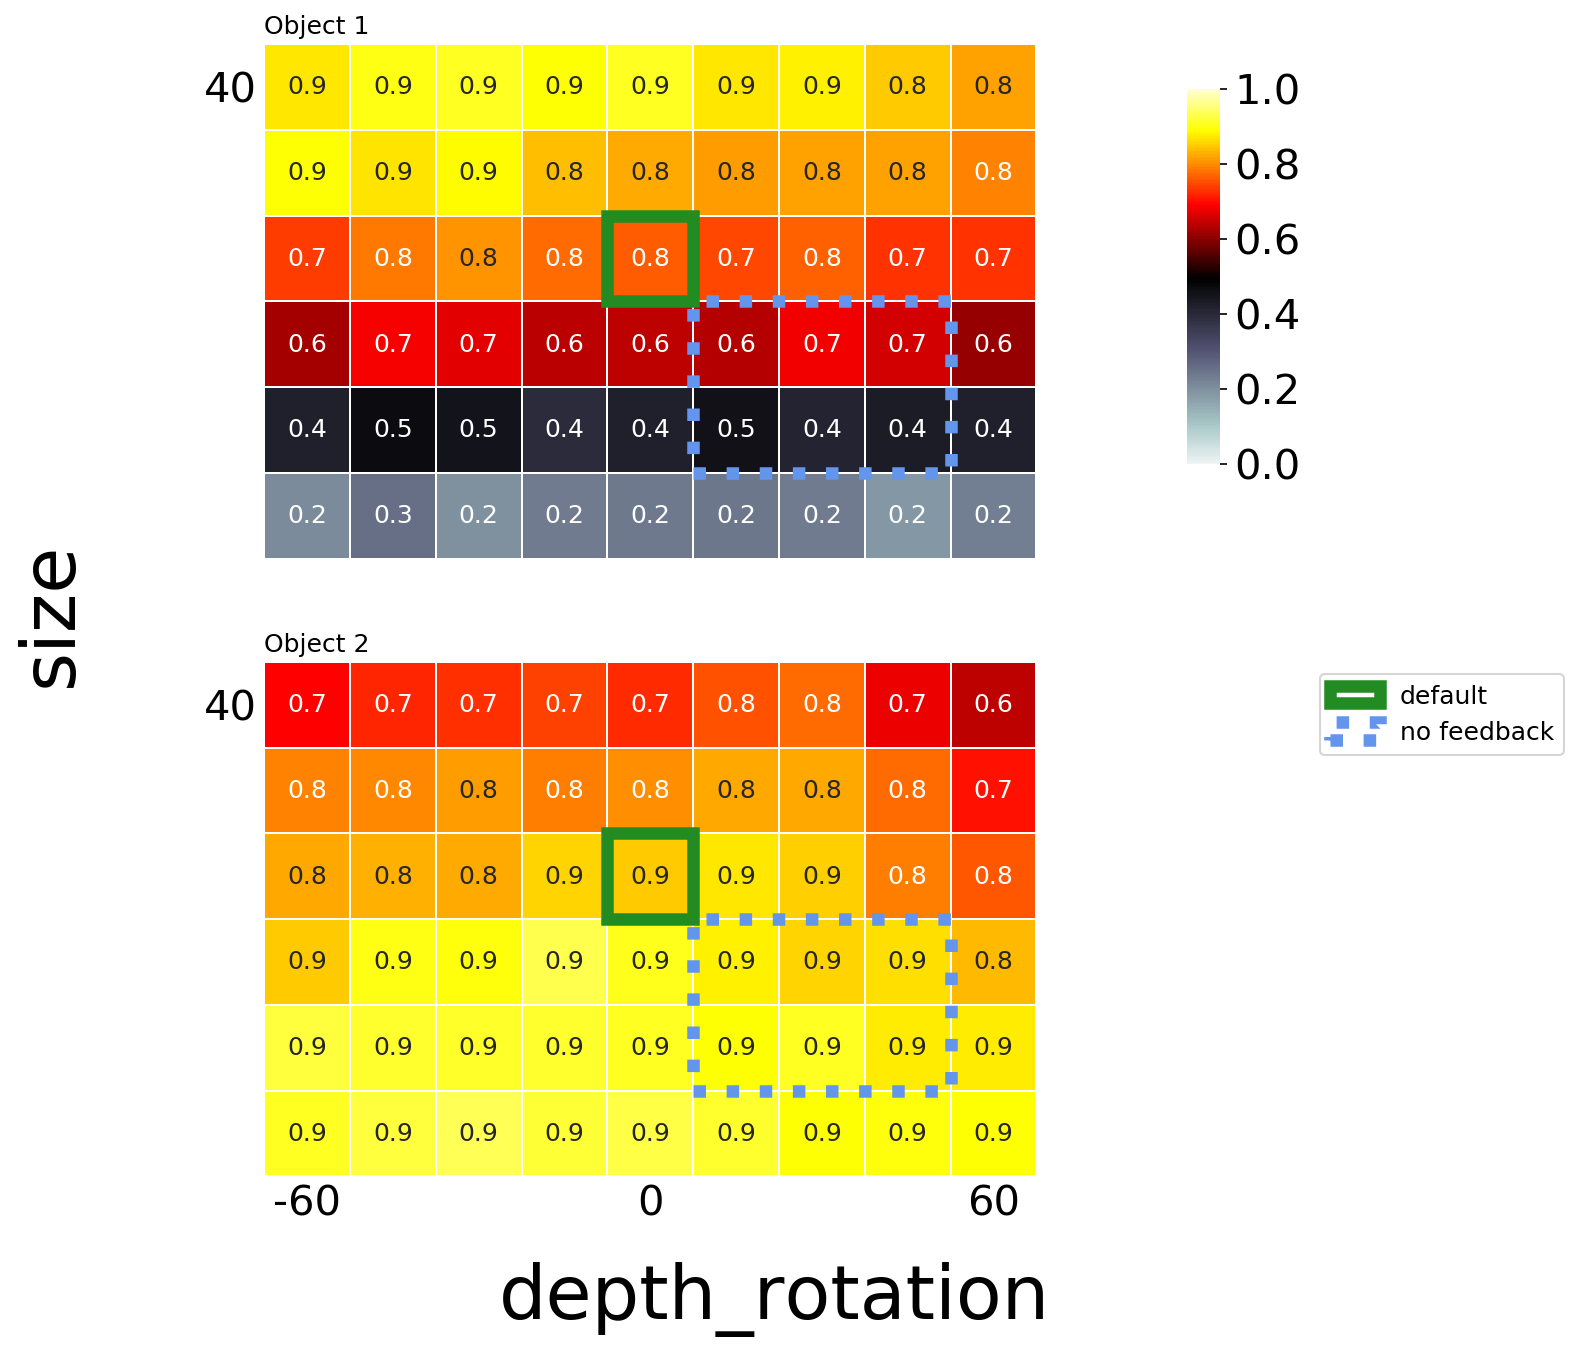

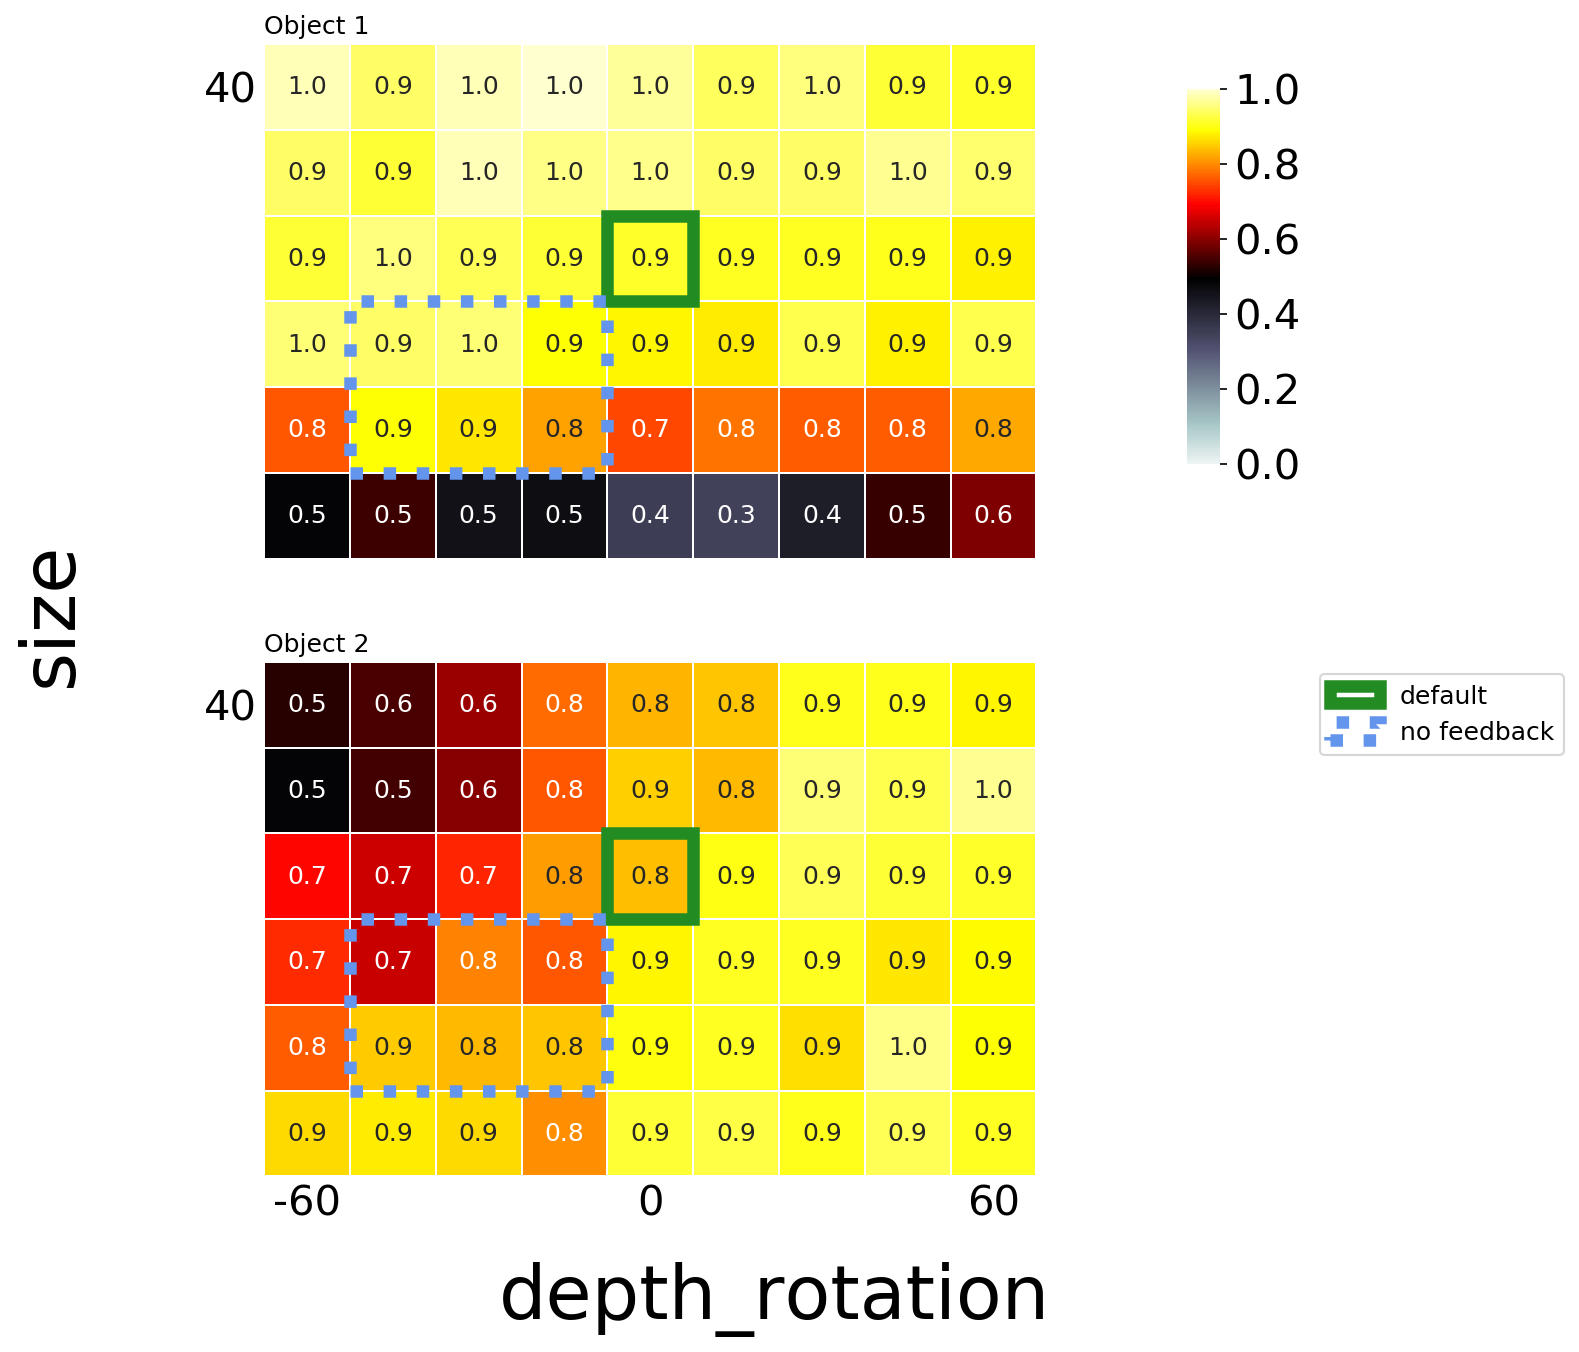

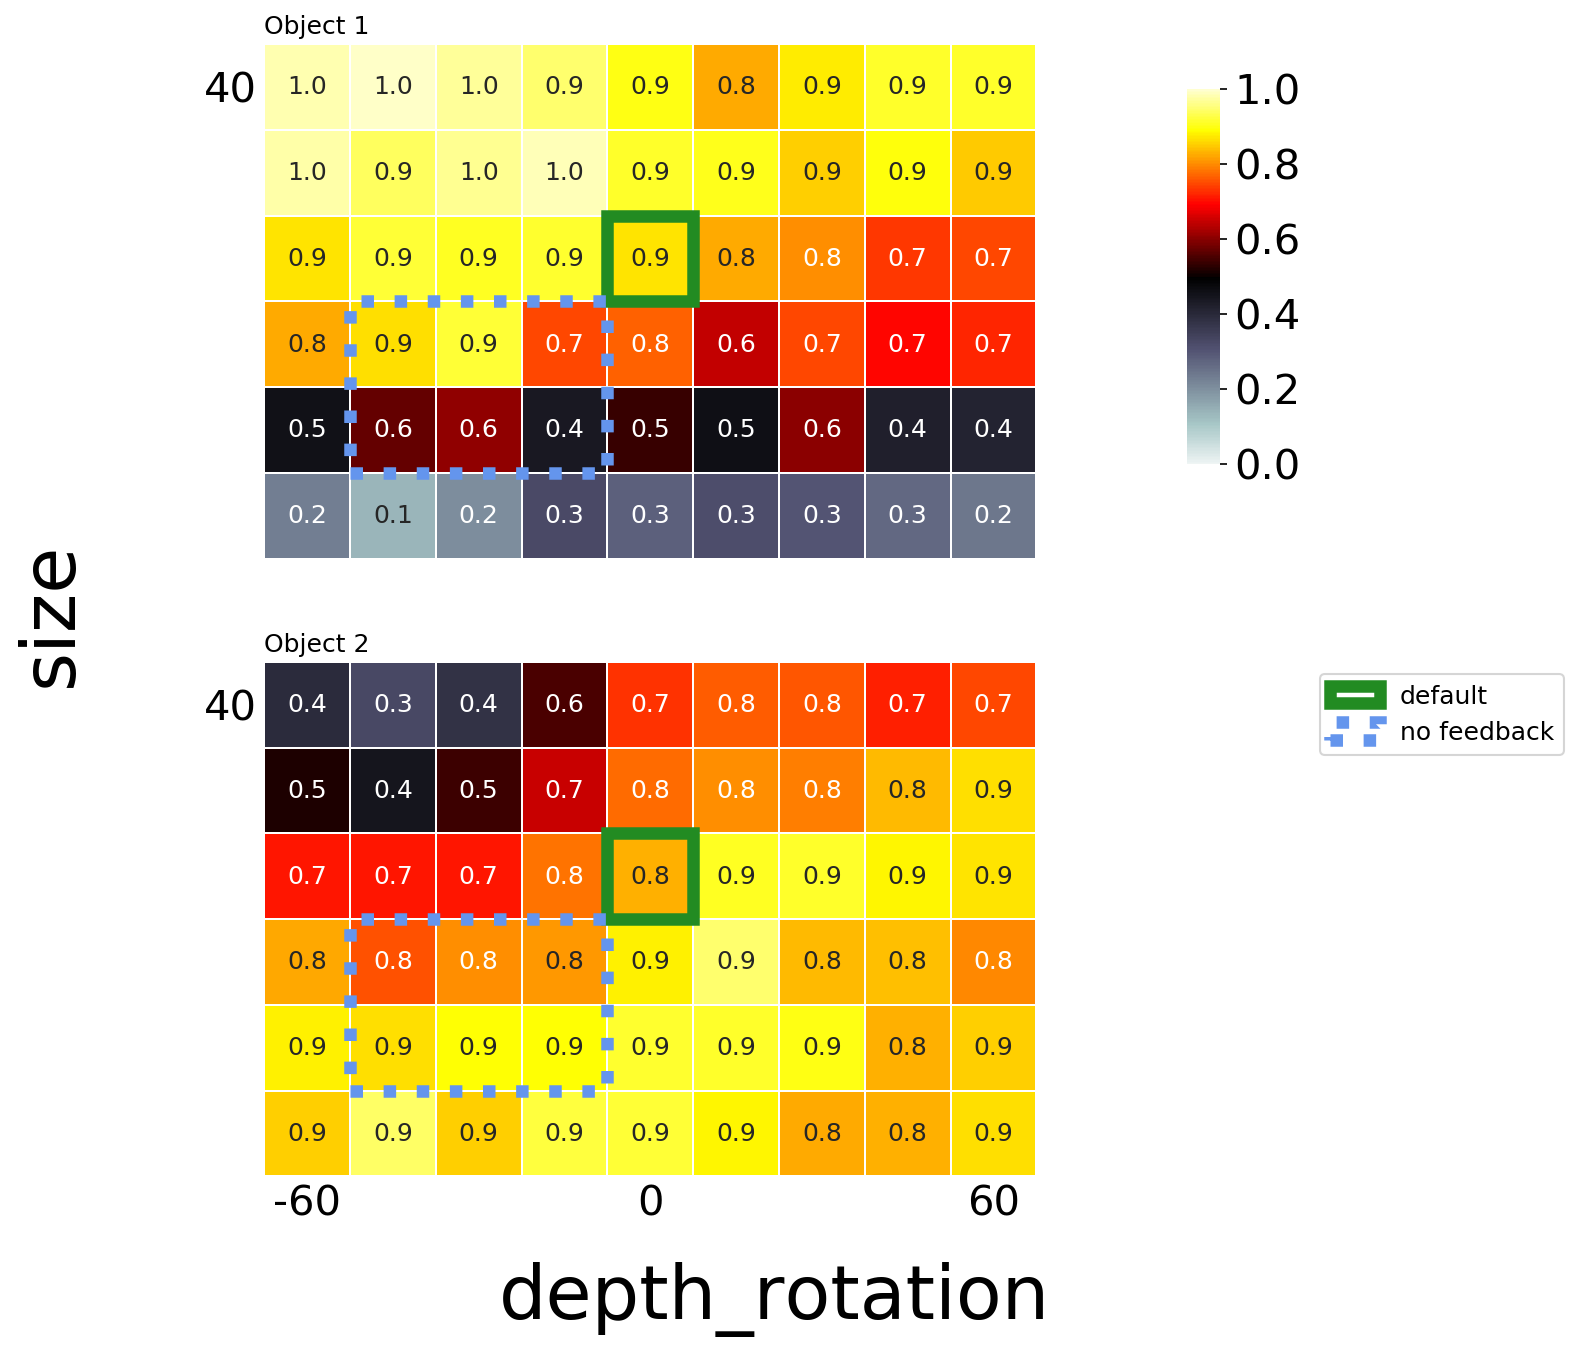

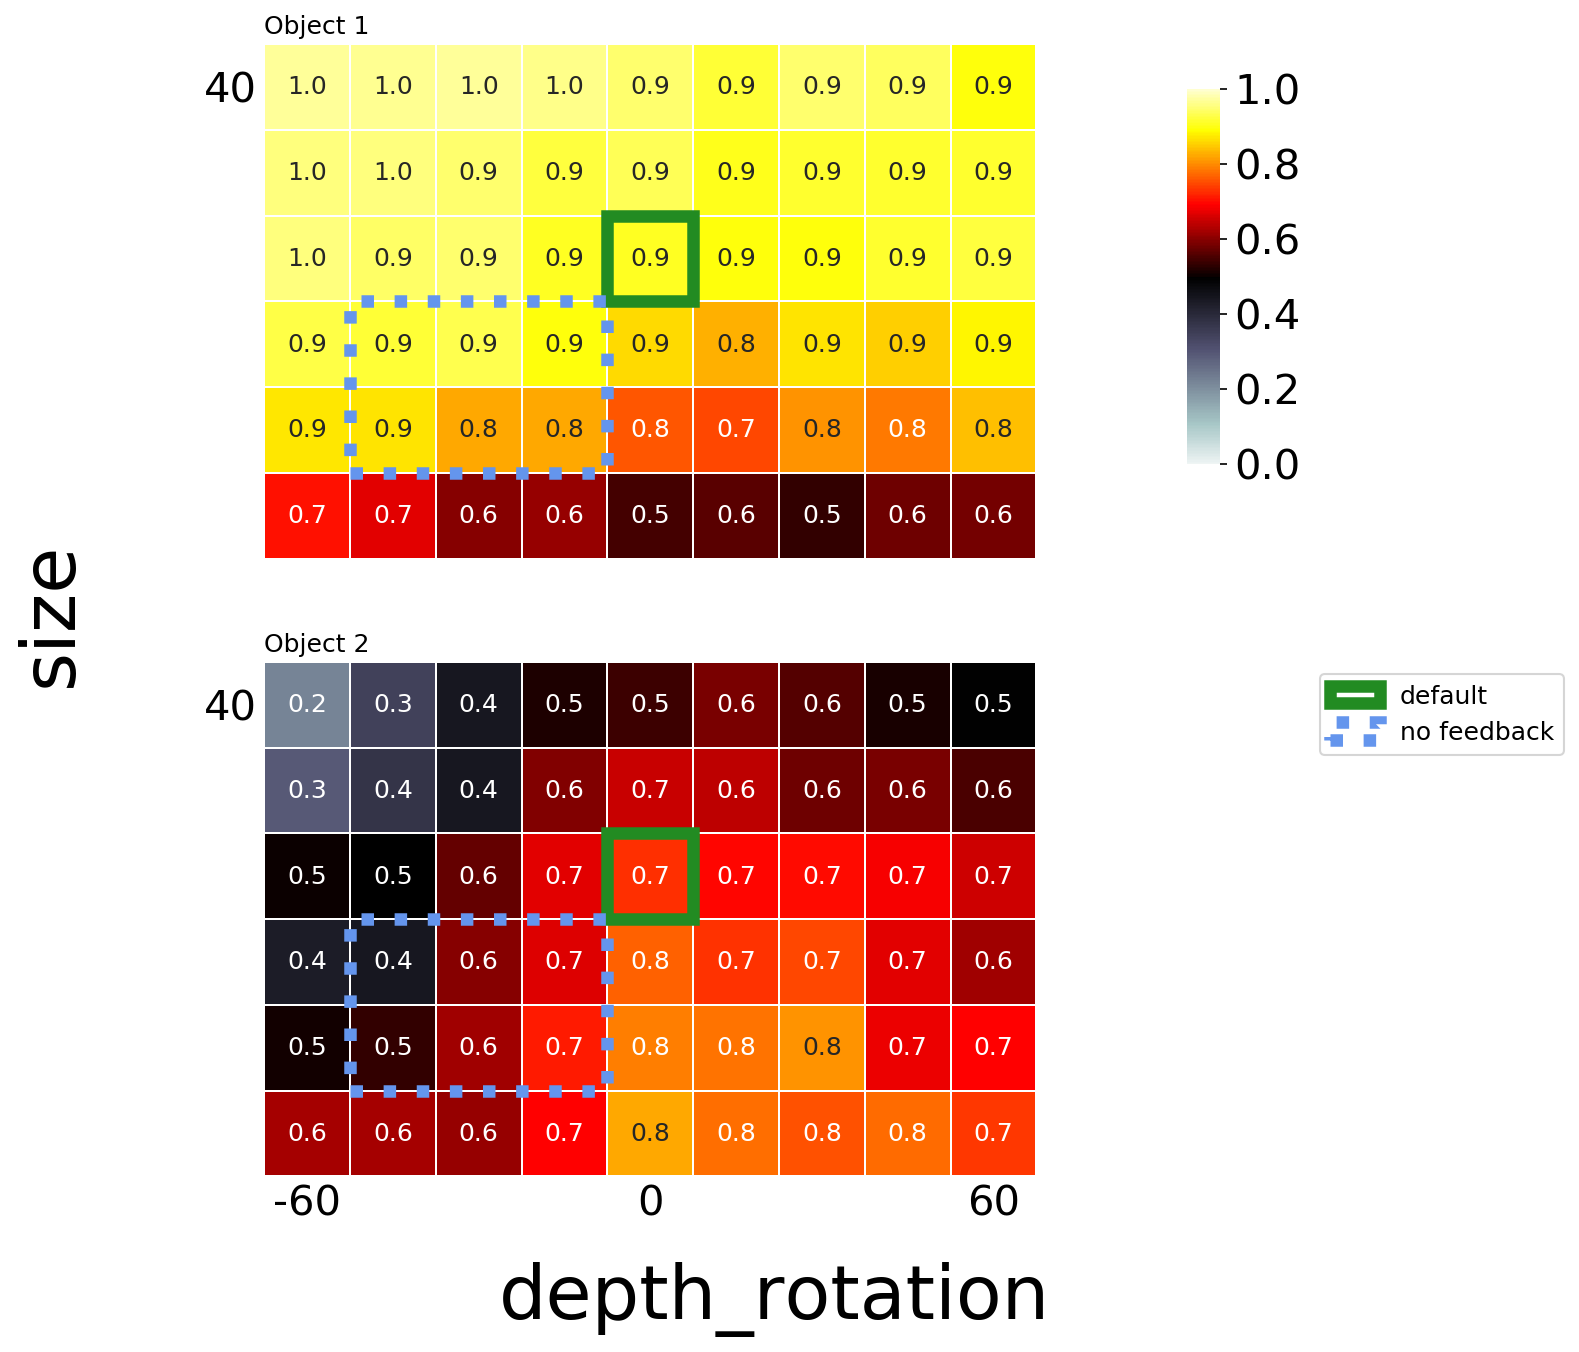

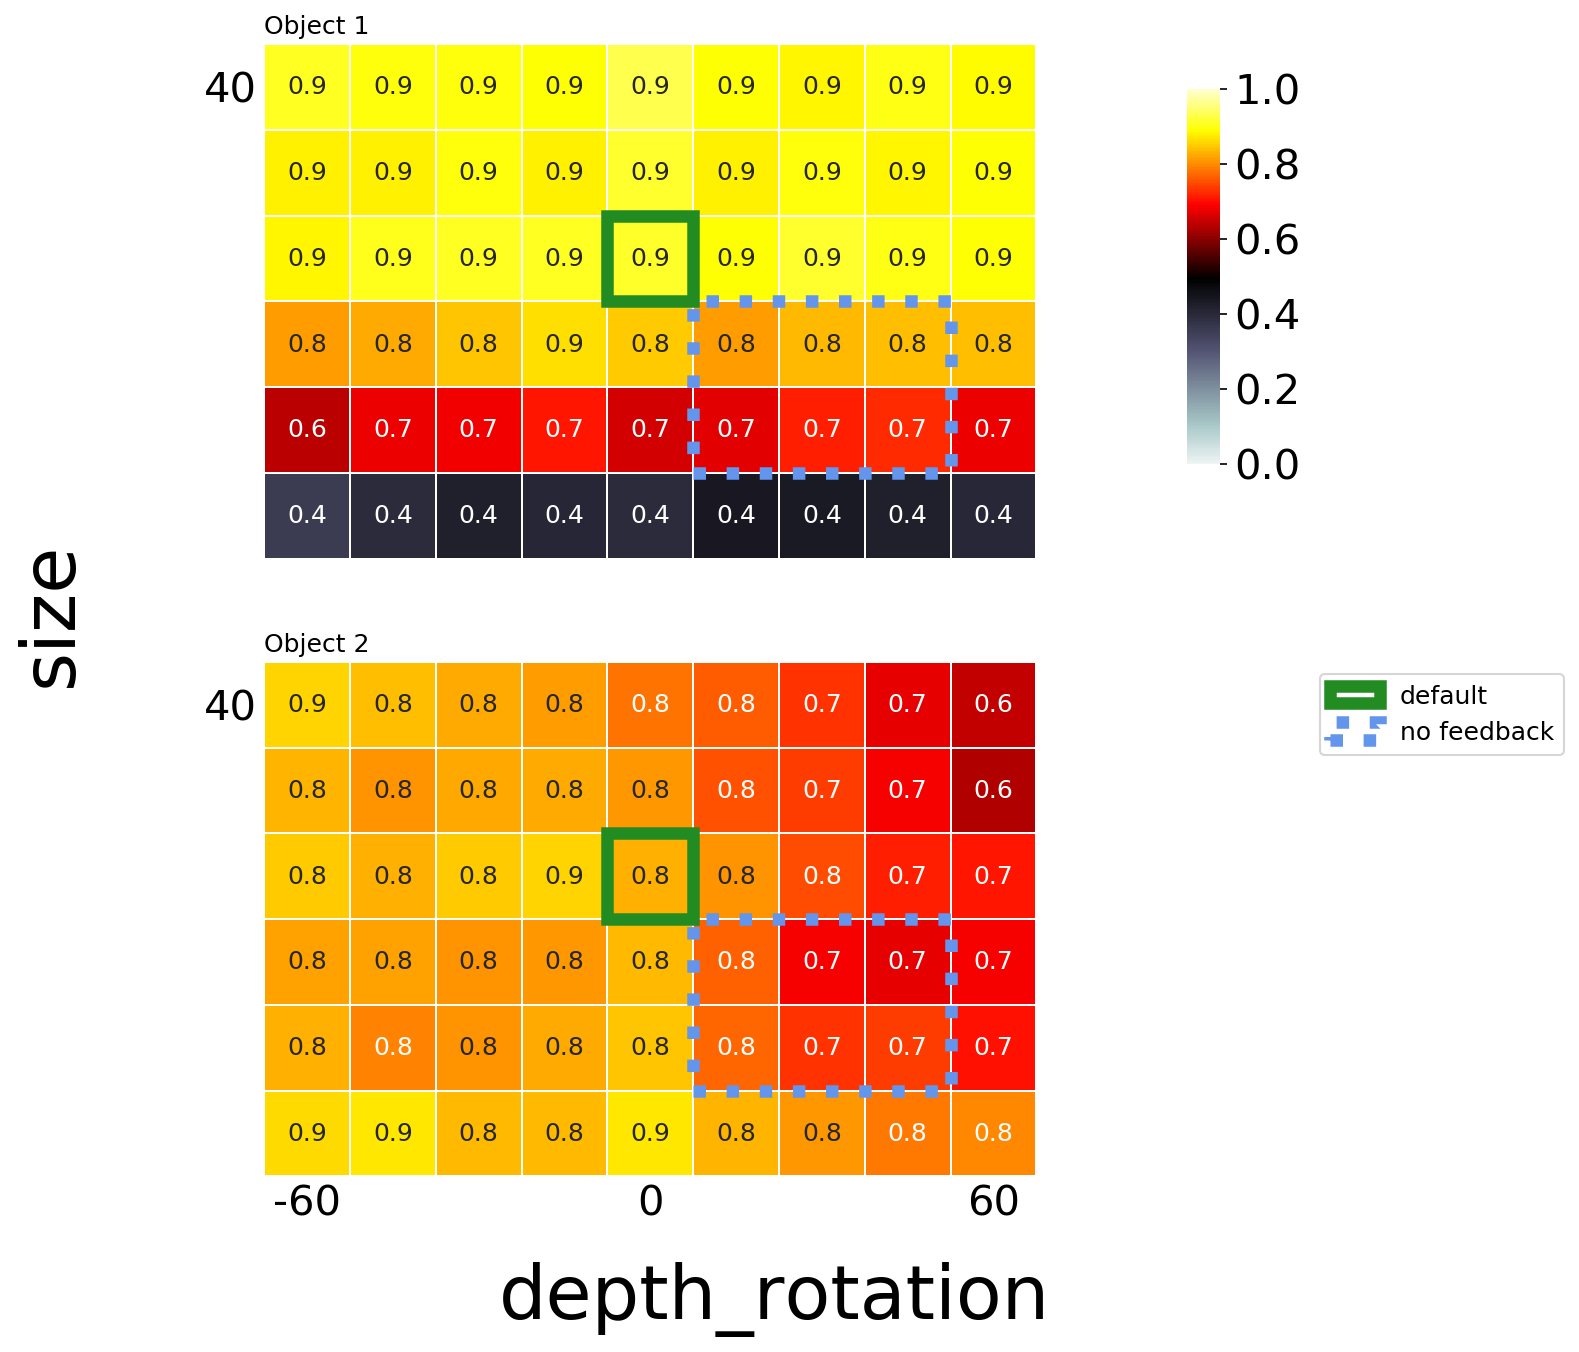

In [192]:
lw = 0.5
lc = 'w'
annot=True

seaborn = True

annot_str = '_annot_' if annot else ''


if plot_each_animal:
    for ai, (animalid, hmap_d) in enumerate(HMAPS.items()):
        if animalid not in animals_nofeedback:
            continue

        cohort = re.findall(r'(\D+)', animalid)[0]
        print(cohort)
        defaults = ph.get_default_params(cohort)
        
        if no_feedback_flag:
            curr_no_fb = no_feedback[animalid]
        else:
            curr_no_fb = None

        fw = min([ int(round(len(col_values)*1.2)), 16])
        fh = len(object_ids)*5

        annot_str = '_annot_' if annot else ''

        fig, axes = pl.subplots(2, 1, figsize=(fw, fh), 
                                dpi=dpi, sharex=True, sharey=True)
        fig.patch.set_alpha(0)

        cbar_ax = fig.add_axes([0.75, 0.6, 0.02, 0.25])

        hmap_d = HMAPS[animalid]
        for oi, objectid in enumerate(object_ids):
            ax = axes[oi]
            hmap = np.nanmean(hmap_d[objectid], axis=-1)
            im = sns.heatmap(hmap, cmap=pnas_cmap, vmin=0, vmax=1, ax=ax,
                            cbar=oi==0, cbar_ax=0 if oi else cbar_ax, center=0.5, linewidths=lw, linecolor=lc,
                             annot=annot, fmt=".1f",  annot_kws={"size": 12})

            plotting.format_size_depth_ticks(ax, xvals=col_values, yvals=row_values, seaborn=True) #xmax=xmax, ymax=ymax, 
            if curr_no_fb is not None:
                plotting.draw_no_feedback(ax, curr_no_fb, defaults, seaborn=True, lw=6)

            if annot:
                ax.set_title('Object %s' % objectid, fontsize=12, loc='left', pad=5)
            ax.tick_params(axis='both', size=0)

            ax.set_aspect('equal')
            ax.invert_yaxis()

        if curr_no_fb is not None:
            ax.legend(bbox_to_anchor=(1.7, 1))

        pl.subplots_adjust(hspace=0.2, wspace=0.1, right=0.7, left=0.15)

        fig.text(0.5, 0.03, col_feature, ha='center', fontsize=36)
        fig.text(0.04, 0.5, row_feature, va='center', rotation='vertical', fontsize=36)

        figname = '%sheatmap_split-object_%s_%s' % (annot_str, phase_str, animalid)
        print(figname)

        pl.savefig(os.path.join(outdir, 'individuals', '%s.svg' % figname))
        #pl.savefig(os.path.join(curr_outdir, 'individuals', '%s.png' % figname))


In [193]:
HMAPS.keys()

['AG11',
 'AG10',
 'AJ8',
 'AJ9',
 'AJ1',
 'AJ4',
 'AJ5',
 'AJ6',
 'AJ7',
 'AJ12',
 'AJ13',
 'AJ10',
 'AJ16',
 'AJ14',
 'AJ15',
 'AG9',
 'AG8',
 'AG7',
 'AG6',
 'AG5',
 'AG4',
 'AG3',
 'AG2',
 'AG1']

/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice


heatmap_split-object_phase-4-5_AG-AJ


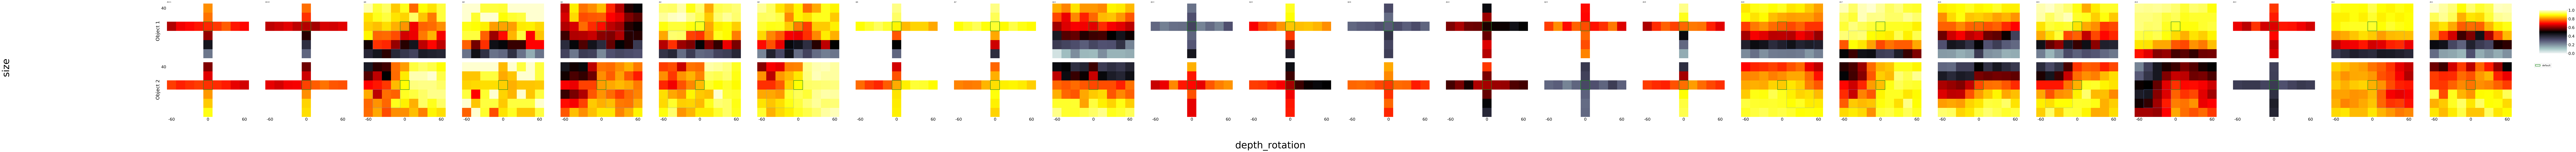

In [201]:
plot_each_animal=False
if not plot_each_animal:
    seaborn = True
    dpi=200

    fig, axes = pl.subplots(2, len(HMAPS.keys()), figsize=(len(animal_ids)*8, len(object_ids)*6), 
                            dpi=150, sharex=True, sharey=True)
    cbar_ax = fig.add_axes([0.96, 0.58, 0.01, 0.25])

    for ai, (animalid, hmap_d) in enumerate(HMAPS.items()):
        
        cohort = re.findall(r'(\D+)', animalid)[0]
        defaults = ph.get_default_params(cohort)

        if no_feedback_flag:
            curr_no_fb = no_feedback[animalid]
        else:
            curr_no_fb = None

        for oi, okey in enumerate(object_ids):
            ax = axes[oi, ai]
            hmap = np.nanmean(hmap_d[okey], axis=-1)
            im = sns.heatmap(hmap, cmap=pnas_cmap, vmin=0, vmax=1, ax=ax,
                            cbar=ai==0, cbar_ax=None if ai else cbar_ax)
            ax.set_aspect('equal')
            ax.invert_yaxis()
            
            plotting.format_size_depth_ticks(ax, xvals=col_values, yvals=row_values, seaborn=True)
                                    #xmax=xmax, ymax=ymax, seaborn=seaborn)
            if curr_no_fb is not None:
                plotting.draw_no_feedback(ax, curr_no_fb, defaults, seaborn=seaborn)
                
            ax.tick_params(axis='both', size=0)
            
            if ai==0:
                ax.set_ylabel('Object %s' % okey)
                
            if oi==0:
                ax.set_title(animalid, fontsize=8, loc='left', pad=5)

    ax.legend(bbox_to_anchor=(1.5, 1))

    if not seaborn:
        cbar_ax = fig.add_axes([1.5, 0.58, 0.01, 0.25])
        fig.colorbar(im, cax=cbar_ax)

    pl.subplots_adjust(left=0.1, hspace=0.0, wspace=0.2, right=0.95, bottom=0.2)

    fig.text(0.5, 0.03, col_feature, ha='center', fontsize=48)
    fig.text(0.04, 0.5, row_feature, va='center', rotation='vertical', fontsize=48)


    figname = 'heatmap_split-object_%s_%s' % (phase_str, '-'.join(cohort_list))
    print(figname)

    pl.savefig(os.path.join(outdir,  'individuals', '%s.svg' % figname))
    #pl.savefig(os.path.join(curr_outdir, '%s.png' % figname))
    #pl.close()

## Plot no-feedback performance only

In [205]:
heatdf.head()

animalid    avg_rt  depth_rotation  n_trials objectid  perc_correct  \
0      AG1  0.629822             -60      15.0        1      0.866667   
1      AG1  0.751915             -45      15.0        1      1.000000   
2      AG1  0.801743             -30      14.0        1      0.642857   
3      AG1  0.618619             -15      15.0        1      0.933333   
4      AG1  0.923619               0      15.0        1      0.600000   

    session  size suffix  
0  20150608  30.0         
1  20150608  30.0         
2  20150608  30.0         
3  20150608  30.0         
4  20150608  15.0

In [228]:
defaults

{'check_alwaysreward': False,
 'depth_rotation': 0.0,
 'expected_depth_rotations': array([-60., -45., -30., -15.,   0.,  15.,  30.,  45.,  60.]),
 'expected_sizes': array([15., 20., 25., 30., 35., 40.]),
 'fine_depth_rotations': array([-60., -55., -50., -45., -40., -35., -30., -25., -20., -15., -10.,
         -5.,   0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,
         50.,  55.,  60.]),
 'planar_rotation': 0.0,
 'size': 30,
 'standard_depth_rotations': array([-60., -45., -30., -15.,   0.,  15.,  30.,  45.,  60.])}

In [234]:
default_size = defaults['size']
default_depth_rotation = defaults['depth_rotation']

cross_views = [(default_size, rot) for rot in defaults['expected_depth_rotations']]
cross_views.extend([(sz, default_depth_rotation) for sz in defaults['expected_sizes']])
cross_views


[(30, -60.0),
 (30, -45.0),
 (30, -30.0),
 (30, -15.0),
 (30, 0.0),
 (30, 15.0),
 (30, 30.0),
 (30, 45.0),
 (30, 60.0),
 (15.0, 0.0),
 (20.0, 0.0),
 (25.0, 0.0),
 (30.0, 0.0),
 (35.0, 0.0),
 (40.0, 0.0)]

In [236]:
import itertools

In [669]:
all_combos = list(itertools.product(defaults['expected_sizes'], defaults['expected_depth_rotations']))
offcross_views = [c for c in all_combos if c not in cross_views]

In [671]:
cross_views

[(30, -60.0),
 (30, -45.0),
 (30, -30.0),
 (30, -15.0),
 (30, 0.0),
 (30, 15.0),
 (30, 30.0),
 (30, 45.0),
 (30, 60.0),
 (15.0, 0.0),
 (20.0, 0.0),
 (25.0, 0.0),
 (30.0, 0.0),
 (35.0, 0.0),
 (40.0, 0.0)]

In [673]:
# twin_metric = 'avg_rt'
# curr_metric = 'perc_correct'
# currphase = 5

# dlist = []
# incl_animals = [k for k, v in no_feedback.items() if len(v) > 0]
# for animalid, hdf in heatdf[(heatdf.animalid.isin(incl_animals)) 
#                             & (heatdf.phase==currphase)].groupby(['animalid']):

#     off_sizes = [f[0] for f in offcross_views]
#     off_drots = [f[1] for f in offcross_views]
#     offcross_accuracy = hdf[(hdf.animalid==animalid) 
#                            & (hdf['size'].isin(off_sizes)) 
#                            & (hdf['depth_rotation'].isin(off_drots))].groupby(['session']).mean()[curr_metric]
    
#     offcross_rt = hdf[(hdf.animalid==animalid) 
#                    & (hdf['size'].isin(off_sizes)) 
#                    & (hdf['depth_rotation'].isin(off_drots))].groupby(['session']).mean()[twin_metric]

#     offcross_sessions = offcross_accuracy.index.tolist()
    
#     fb_sizes = [f[0] for f in no_feedback[animalid]]
#     fb_drots = [f[1] for f in no_feedback[animalid]]
#     nofb_accuracy = hdf[(hdf.animalid==animalid)  & (hdf.session.isin(offcross_sessions))
#                        & (hdf['size'].isin(fb_sizes)) 
#                        & (hdf['depth_rotation'].isin(fb_drots))].groupby(['session']).mean()[curr_metric]
    
#     nofb_rt = hdf[(hdf.animalid==animalid)  & (hdf.session.isin(offcross_sessions))
#                        & (hdf['size'].isin(fb_sizes)) 
#                        & (hdf['depth_rotation'].isin(fb_drots))].groupby(['session']).mean()[twin_metric]

    
#     default_accuracy = hdf[(hdf.animalid==animalid)  & (hdf.session.isin(offcross_sessions))
#                            & (hdf['size']==default_size) 
#                            & (hdf['depth_rotation']==default_depth_rotation)].groupby(['session']).mean()[curr_metric]
    
#     default_rt = hdf[(hdf.animalid==animalid)  & (hdf.session.isin(offcross_sessions))
#                            & (hdf['size']==default_size) 
#                            & (hdf['depth_rotation']==default_depth_rotation)].groupby(['session']).mean()[twin_metric]

#     print(len(nofb_accuracy), len(default_accuracy), len(offcross_accuracy))
#     dlist.append(pd.DataFrame({'nofb_accuracy': nofb_accuracy,
#                               'nofb_rt': nofb_rt,
#                                'offcross_accuracy': offcross_accuracy,
#                                'offcross_rt': offcross_rt,
#                                'default_accuracy': default_accuracy,
#                                'default_rt': default_rt,
#                               'animalid': [animalid for _ in np.arange(0, len(default_rt))]}))


# fb_df = pd.concat(dlist, axis=0).reset_index(drop=True)

# fb_df['nofb_relative_accuracy'] = fb_df['nofb_accuracy'] / fb_df['default_accuracy']
# fb_df['nofb_relative_rt'] = fb_df['nofb_rt'] / fb_df['default_rt']


# fb_df = fb_df.replace([np.inf, -np.inf], np.nan).dropna()


In [224]:

# fb_animal_ids = sorted(fb_df['animalid'].unique(), key=util.natural_keys)


In [674]:
# fig, ax = pl.subplots(dpi=dpi, figsize=(5,4))

# curr_metric = 'nofb_accuracy'

# sns.barplot(x='animalid', y=curr_metric, order=fb_animal_ids,
#             data=fb_df, ax=ax, 
#             linewidth=2.5, facecolor=(1, 1, 1, 0),
#             errcolor='k', edgecolor='k')

# sns.swarmplot(x='animalid', y=curr_metric,  order=fb_animal_ids,
#               data=fb_df, ax=ax, color='k', alpha=0.5)
# ax.tick_params(axis='x', size=0)

# sns.despine(trim=True, offset=8, bottom=True)

# ax.set_xticklabels([int(a[2:]) for a in fb_animal_ids])
# pl.subplots_adjust(left=0.3, right=0.9, bottom=0.3)
# if 'accuracy' in curr_metric:
#     ax.set_ylabel('perc. correct')
# else:
#     ax.set_ylabel('reaction time (s)')
# ax.set_xlabel('animal')

# figname = '%s-by-animal_%s' % (curr_metric, cohort)
# print(figname)

# pl.savefig(os.path.join(outdir, '%s.svg' % figname))


In [798]:
fbdf = []
for animalid, hdf in heatdf[(heatdf.animalid.isin(incl_animals)) 
                            & (heatdf.phase==currphase)].groupby(['animalid']):
    
    off_ = pd.concat([g for (sz, dr), g in hdf.groupby(['size', 'depth_rotation']) \
                      if (sz, dr) in offcross_views \
                     and (sz, dr) not in no_feedback[animalid]], axis=0).reset_index(drop=True)
    off_['type'] = ['off_cross' for _ in np.arange(0, len(off_))]

    all_offcross_ = pd.concat([g for (sz, dr), g in hdf.groupby(['size', 'depth_rotation']) \
                      if (sz, dr) in offcross_views], axis=0).reset_index(drop=True)
    all_offcross_['type'] = ['all_offcross' for _ in np.arange(0, len(all_offcross_))]

    nofb_ = pd.concat([g for (sz, dr), g in hdf.groupby(['size', 'depth_rotation']) \
                      if (sz, dr) in no_feedback[animalid]], axis=0).reset_index(drop=True)
    nofb_['type'] = ['no_feedback' for _ in np.arange(0, len(nofb_))]

    nofb_sizes = np.unique([f[0] for f in no_feedback[animalid]])
    nofb_drots = np.unique([f[1] for f in no_feedback[animalid]])
    sizematched_ = pd.concat([g for (sz, dr), g in hdf.groupby(['size', 'depth_rotation']) \
                      if (sz in nofb_sizes) and (drot not in nofb_drots)], axis=0).reset_index(drop=True)
    sizematched_['type'] = ['size_matched' for _ in np.arange(0, len(sizematched_))]

    
    defaults_ = pd.concat([g for (sz, dr), g in hdf.groupby(['size', 'depth_rotation']) \
                      if sz==default_size and dr==default_depth_rotation], axis=0).reset_index(drop=True)
    defaults_['type'] = ['default_view' for _ in np.arange(0, len(defaults_))]

    cross_ = pd.concat([g for (sz, dr), g in hdf.groupby(['size', 'depth_rotation']) \
                       if (sz, dr) in cross_views], axis=0).reset_index(drop=True)
                        #and (sz, dr)!=(default_size, default_depth_rotation)], axis=0).reset_index(drop=True)
    cross_['type'] = ['cross_view' for _ in np.arange(0, len(cross_))]

    fbdf.append(pd.concat([all_offcross_, off_, nofb_, sizematched_, defaults_, cross_], axis=0))
fbdf = pd.concat(fbdf, axis=0)

In [799]:
means_ = fbdf.groupby(['type', 'animalid', 'session']).mean()
feedback_means = means_.stack(level=0).reset_index(name='value')


In [800]:
plotting.update_fonts(labelsize=12)

/n/coxfs01/behavior-data/threeport/processed/basic-training/pnas-style
perc_correct_compare_nofeedback_cross_view_size_matched_by-individual_


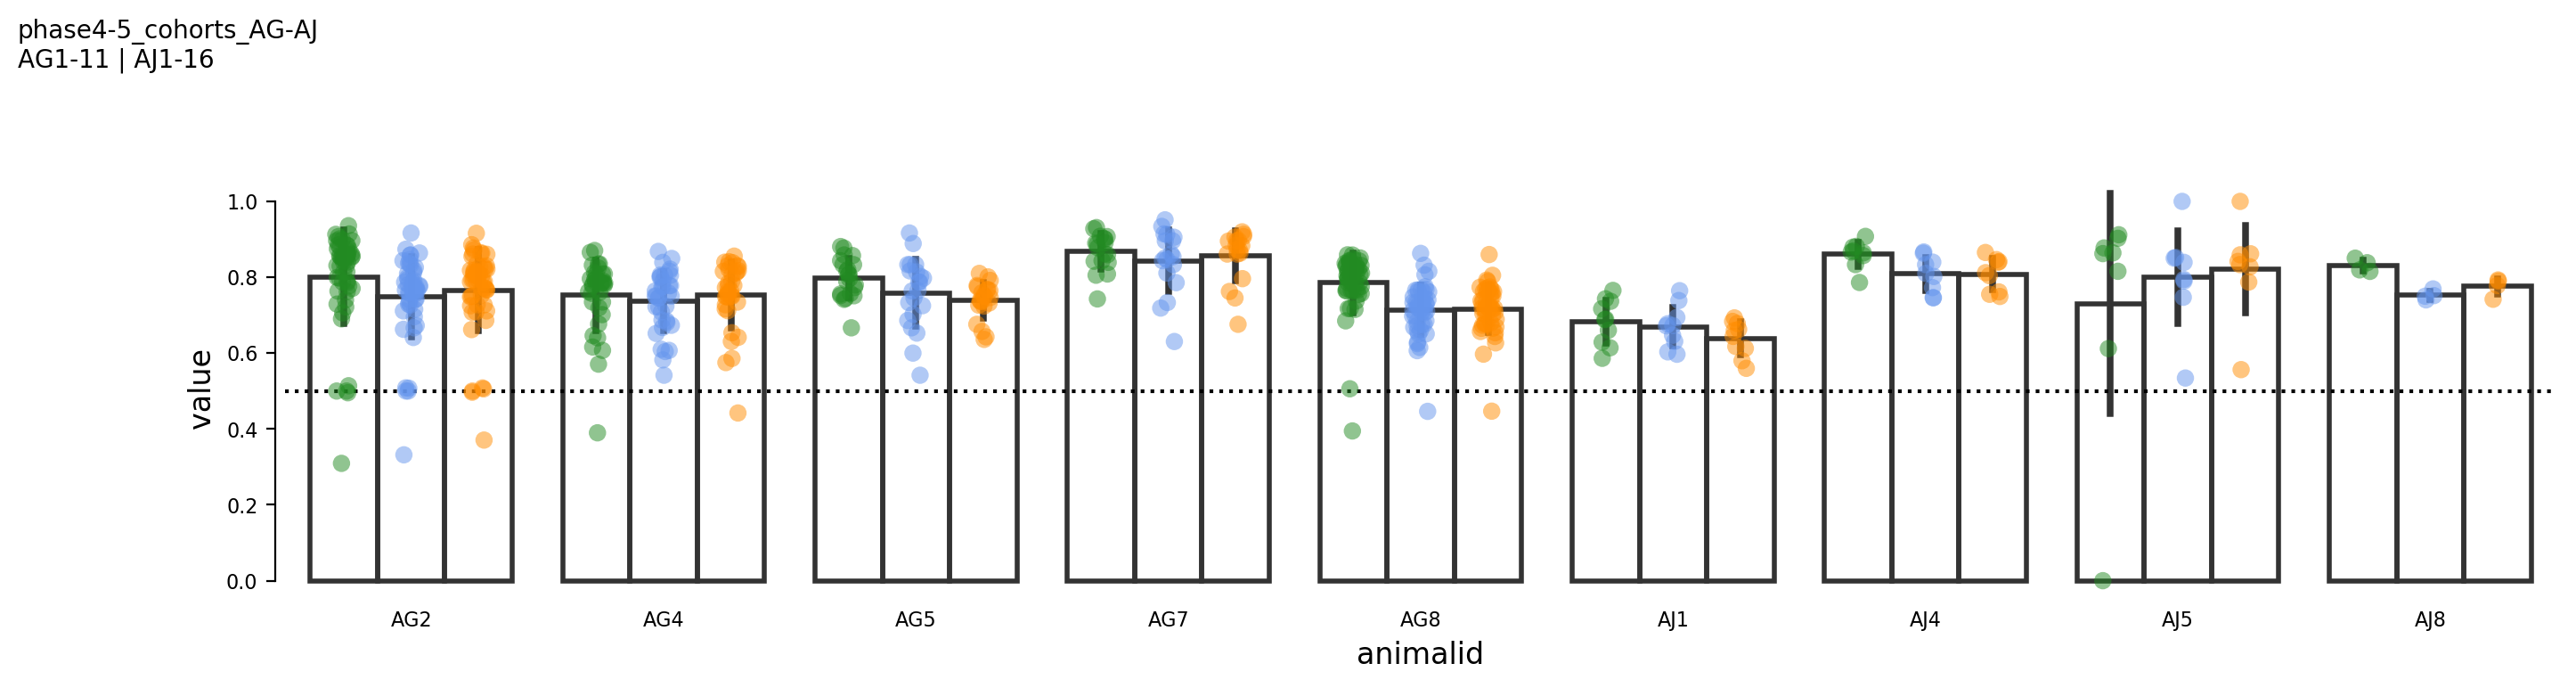

In [802]:
default_type = 'cross_view'
nofb_control_type = 'size_matched'

metric = 'perc_correct'

feedback_colors = {default_type: 'forestgreen', 
                   'no_feedback': 'cornflowerblue', 
                   nofb_control_type: 'darkorange'}

tdf = feedback_means[(feedback_means.level_3==metric) & (feedback_means.type.isin(feedback_colors.keys()))].copy()

fig, ax = pl.subplots(figsize=(15,4), dpi=dpi)
fig.patch.set_alpha(0.0)
sns.stripplot(x='animalid', y='value', data=tdf, ax=ax, #ci='sd',
               hue='type', palette=feedback_colors, dodge=True, alpha=0.5, size=7,
             edgecolor='k', hue_order=[default_type, 'no_feedback', nofb_control_type])

sns.barplot(x='animalid', y='value', data=tdf, ax=ax, ci='sd',
           hue='type', color='k', #palette=feedback_colors, legend=False,
            linewidth=2, facecolor=(1, 1, 1, 0),
                 errcolor=".2", edgecolor=".2")

ax.axhline(y=0.5, linestyle=':', color='k')
ax.patch.set_alpha(0.)

#ax.set_xticklabels('') 
#ax.set_xticks([])
ax.tick_params(axis='x', size=0)
sns.despine(bottom=True, trim=True, offset=4)
pl.subplots_adjust(left=0.1, right=0.95, bottom=0.2, top=0.8)

ax.legend_.remove() #(bbox_to_anchor=(1.5, 1))

fig.text(0, 0.95, figid)

figname = '%s_compare_nofeedback_%s_%s_by-individual_' % (metric, default_type, nofb_control_type)
pl.savefig(os.path.join(outdir, '%s.svg' % figname))
print(outdir)
print(figname)

/n/coxfs01/behavior-data/threeport/processed/basic-training/pnas-style
perc_correct_compare_nofeedback_cross_view_size_matched_ALL


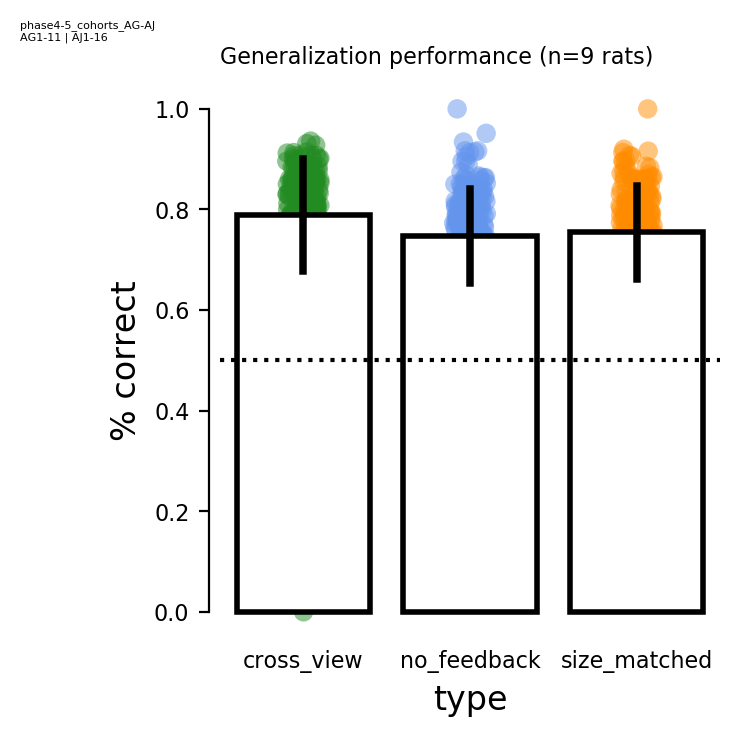

In [822]:
feedback_colors = {default_type: 'forestgreen', 
                   'no_feedback': 'cornflowerblue', 
                   nofb_control_type: 'darkorange'}


metric = 'perc_correct'
tdf = feedback_means[(feedback_means.level_3==metric) & (feedback_means.type.isin(feedback_colors.keys()))].copy()

fig, ax = pl.subplots(figsize=(5,4), dpi=dpi)
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.)

sns.stripplot(x='type', y='value', data=tdf, ax=ax, zorder=0, #ci='sd',
               hue='type', palette=feedback_colors, dodge=False, alpha=0.5, size=7,
             edgecolor='k', hue_order=[default_type, 'no_feedback', nofb_control_type])

sns.barplot(x='type', y='value', data=tdf, ax=ax, ci='sd',
           hue=None, color='k', #palette=feedback_colors, legend=False,
            linewidth=2, facecolor=(1, 1, 1, 0), alpha=1.0, 
            errcolor="k", edgecolor="k")

ax.axhline(y=0.5, linestyle=':', color='k')

ax.tick_params(axis='x', size=0)
sns.despine(bottom=True, trim=True, offset=4)
ax.set_ylabel('% correct')
ax.set_title('Generalization performance (n=%i rats)' % (len(tdf['animalid'].unique())),
            loc='left', fontsize=8)

pl.subplots_adjust(left=0.2, right=0.7, bottom=0.2, top=0.9)
ax.legend_.remove() #(bbox_to_anchor=(1.5, 1))



fig.text(0, 0.95, figid, fontsize=4)

figname = '%s_compare_nofeedback_%s_%s_ALL' % (metric, default_type, nofb_control_type)
pl.savefig(os.path.join(outdir, '%s.svg' % figname))
print(outdir)
print(figname)

In [820]:
feedback_means['animalid'].unique()

array(['AG2', 'AG4', 'AG5', 'AG7', 'AG8', 'AJ1', 'AJ4', 'AJ5', 'AJ8'],
      dtype=object)

#### Check stats

In [807]:
means_by_type = tdf.groupby(['type', 'animalid']).mean().reset_index()


In [808]:
x1 = means_by_type[means_by_type['type']==default_type]['value']
x2 = means_by_type[means_by_type['type']=='no_feedback']['value']
x3 = means_by_type[means_by_type['type']==nofb_control_type]['value']


In [809]:
vs = [x1, x2, x3]
spstats.kruskal(*vs)

KruskalResult(statistic=1.3156966490299737, pvalue=0.5179646281313186)

In [810]:
# Fits the model with the interaction term
# This will also automatically include the main effects for each factor

#standarddf_no0 = standarddf_split[standarddf_split['bbox']!=0].copy()

#model = ols('overall_accuracy ~ C(box_pos)*C(tower)', standarddf_no0).fit()
# model = ols('overall_accuracy ~ C(tower)', standarddf_no0).fit()
model = ols('value ~ C(type)', means_by_type).fit()

# Seeing if the overall model is significant
print("Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}".format(model=model))
    

Overall model F( 2, 24) =  0.710, p =  0.5017


In [686]:

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.7100
Date:                Thu, 26 Mar 2020   Prob (F-statistic):              0.502
Time:                        14:57:46   Log-Likelihood:                 39.646
No. Observations:                  27   AIC:                            -73.29
Df Residuals:                      24   BIC:                            -69.40
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.7900      0.020     40.095      0.000       0.749       0.831
C(type)[T.no_feedback]     -0.0308      0.028     -1.106      0.280      -0.088       0.027
C(type)[T.size_matched]    -0.0261      0.028     -0.937      0.358      -0.084       0.031
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   2.464
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.731
Skew:                          -0.346   Prob(JB):                        0.694
Kurtosis:                       2.587   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [687]:
# Creates the ANOVA table
res = sm.stats.anova_lm(model, typ= 2)
res

sum_sq    df         F    PR(>F)
C(type)   0.004961   2.0  0.710001  0.501681
Residual  0.083844  24.0       NaN       NaN

# Relative performance for single transform

In [658]:
offcross_df = fbdf[(fbdf.type=='all_offcross')].copy()
offcross_df['sessionid'] = ['%s%s' % (sess, sfx) for sess, sfx, in offcross_df[['session', 'suffix']].values]

In [659]:
offcross_df.head()

animalid    avg_rt  depth_rotation  n_trials objectid  perc_correct  phase  \
0      AG2  0.493214              15       5.0        1      0.200000      5   
1      AG2  0.644833              15       5.0        2      0.800000      5   
2      AG2  0.527882              15       8.0        1      0.125000      5   
3      AG2  0.470636              15       7.0        2      1.000000      5   
4      AG2  0.871177              15       9.0        1      0.555556      5   

    session  size suffix          type sessionid  
0  20151201  15.0         all_offcross  20151201  
1  20151201  15.0         all_offcross  20151201  
2  20151202  15.0         all_offcross  20151202  
3  20151202  15.0         all_offcross  20151202  
4  20151203  15.0         all_offcross  20151203

In [811]:
offdf = pd.concat([g for (sz, dr), g in df.groupby(['size', 'depth_rotation']) \
           if (sz, dr) in offcross_views], axis=0)

In [812]:
params = ['size', 'depth_rotation', 'objectid', 'animalid' ]
new_cols = ['size', 'depth_rotation', 'objectid', 'animalid', 'outcome']
outcome = [s_df.sort_values(by=['session', 'time'])[new_cols].reset_index(drop=True) \
           for (sz, dr, oid, an), s_df in offdf.groupby(params)]
# currdf = pd.DataFrame(outcome, columns=['size', 'depth_rotation', 'objectid', 'animalid', 'success'])

In [813]:
occ = pd.concat(outcome, axis=0).reset_index()
occ = occ.rename(columns={"index": "occurrence"})
occ['success'] = [1.0 if s=='success' else 0.0 for s in occ['outcome'].values]

In [814]:
occ.head()

occurrence  size  depth_rotation  objectid animalid  outcome  success
0           0  15.0             -60         1      AG1  failure      0.0
1           1  15.0             -60         1      AG1  failure      0.0
2           2  15.0             -60         1      AG1  failure      0.0
3           3  15.0             -60         1      AG1  failure      0.0
4           4  15.0             -60         1      AG1  failure      0.0

In [815]:
mean_by_occ = occ.groupby(['occurrence', 'size', 'depth_rotation', 'animalid']).mean()['success'].reset_index()
# average object performance for each animal for each condition, for each occurrence

In [816]:
mean_occ_by_animal = mean_by_occ.groupby(['occurrence', 'animalid']).mean().reset_index()
# average all conds by occurrence number

In [817]:
mean_occ_by_animal['animalid'].unique()

array(['AG1', 'AG2', 'AG4', 'AG5', 'AG6', 'AG7', 'AG8', 'AJ1', 'AJ12',
       'AJ4', 'AJ5', 'AJ8', 'AJ9'], dtype=object)

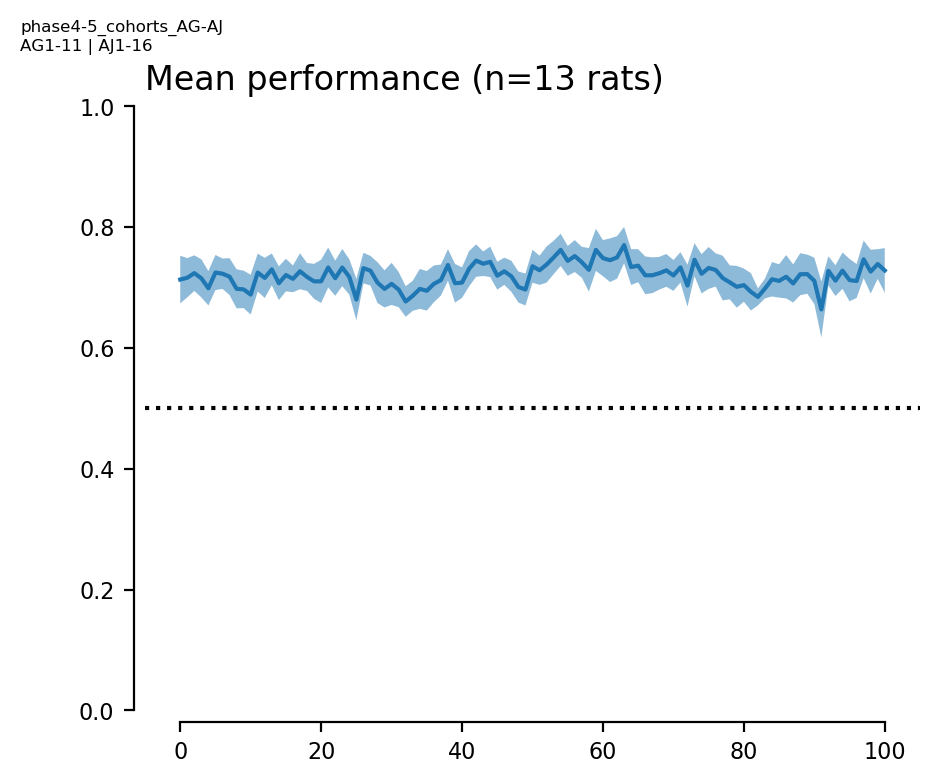

In [818]:
n_occurrences = 100
occdf = mean_occ_by_animal[mean_occ_by_animal['occurrence']<=n_occurrences]

fig, ax = pl.subplots(figsize=(5,4), dpi=dpi)
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.)
#sns.stripplot(x='occurrence', y='success', data=mean_by_occ, ax=ax)

occ_vals = [oc for oc, g in occdf.groupby(['occurrence'])]

means = np.array([g['success'].mean() for oc, g in occdf.groupby(['occurrence'])])
sems = np.array([spstats.sem(g['success'].values) for oc, g in occdf.groupby(['occurrence'])])

ax.plot(occ_vals, means)
ax.fill_between(occ_vals, means-sems, means+sems, alpha=0.5)

ax.set_ylim([0, 1])
ax.axhline(y=0.5, linestyle=':', color='k')

sns.despine(trim=True, offset=4)
n_rats = len(mean_occ_by_animal['animalid'].unique())

fig.text(0, 0.95, figid, fontsize=6)

ax.set_title('Mean performance (n=%i rats)' % n_rats, loc='left', fontsize=12)
pl.savefig(os.path.join(outdir, 'mean_performance_by_occurrence_%i_trials.svg' % n_occurrences))

In [549]:
for animalid, s_df in offcross_df.groupby(['animalid']):
    tmpdf = df[(df['animalid']==animalid) & (df['sessionid'].isin(s_df['sessionid'].unique()))]
    
    outcomes = [(oid, sz, dr, 1) if gg.sort_values(by=['session', 'time']).iloc[0]['outcome']=='success' else (oid, sz, dr, 0) \
                for (oid, sz, dr), gg in tmpdf.groupby(['objectid', 'size', 'depth_rotation'])]
    currdf = pd.DataFrame(outcomes, columns=['objectid', 'size', 'depth_rotation', 'success'])
    currdf['animalid'] = [animalid for _ in np.arange(0, len(currdf))]
    #currdf['sessionid'] = [sessionid for _ in np.arange(0, len(currdf))]

In [551]:
currdf

objectid  size  depth_rotation  success animalid
0           1  15.0             -60        1      AJ8
1           1  15.0             -45        0      AJ8
2           1  15.0             -30        0      AJ8
3           1  15.0             -15        1      AJ8
4           1  15.0               0        1      AJ8
5           1  15.0              15        0      AJ8
6           1  15.0              30        1      AJ8
7           1  15.0              45        1      AJ8
8           1  15.0              60        0      AJ8
9           1  20.0             -60        1      AJ8
10          1  20.0             -45        1      AJ8
11          1  20.0             -30        1      AJ8
12          1  20.0             -15        1      AJ8
13          1  20.0               0        0      AJ8
14          1  20.0              15        1      AJ8
15          1  20.0              30        1      AJ8
16          1  20.0              45        1      AJ8
17          1  20.0              60        0      AJ8
18          1  25.0             -60        1      AJ8
19          1  25.0             -45        1      AJ8
20          1  25.0             -30        1      AJ8
21          1  25.0             -15        1      AJ8
22          1  25.0               0        1      AJ8
23          1  25.0              15        1      AJ8
24          1  25.0              30        1      AJ8
25          1  25.0              45        1      AJ8
26          1  25.0              60        0      AJ8
27          1  30.0             -60        1      AJ8
28          1  30.0             -45        1      AJ8
29          1  30.0             -30        1      AJ8
..        ...   ...             ...      ...      ...
78          2  25.0              30        1      AJ8
79          2  25.0              45        1      AJ8
80          2  25.0              60        1      AJ8
81          2  30.0             -60        1      AJ8
82          2  30.0             -45        1      AJ8
83          2  30.0             -30        0      AJ8
84          2  30.0             -15        1      AJ8
85          2  30.0               0        1      AJ8
86          2  30.0              15        1      AJ8
87          2  30.0              30        1      AJ8
88          2  30.0              45        1      AJ8
89          2  30.0              60        1      AJ8
90          2  35.0             -60        0      AJ8
91          2  35.0             -45        1      AJ8
92          2  35.0             -30        1      AJ8
93          2  35.0             -15        1      AJ8
94          2  35.0               0        1      AJ8
95          2  35.0              15        1      AJ8
96          2  35.0              30        1      AJ8
97          2  35.0              45        1      AJ8
98          2  35.0              60        1      AJ8
99          2  40.0             -60        1      AJ8
100         2  40.0             -45        1      AJ8
101         2  40.0             -30        1      AJ8
102         2  40.0             -15        1      AJ8
103         2  40.0               0        1      AJ8
104         2  40.0              15        1      AJ8
105         2  40.0              30        1      AJ8
106         2  40.0              45        1      AJ8
107         2  40.0              60        1      AJ8

[108 rows x 5 columns]

54

In [541]:
curr_trials = df[(df['animalid']==animalid)].sort_values(by=['session', 'time'])

In [546]:
df['phase'].unique()

array([4, 5])

In [532]:
outcomes = [(oid, sz, dr, 1) if gg.sort_values(by=('session', 'time')).iloc[0]['outcome']=='success' else (oid, sz, dr, 0) \
            for (oid, sz, dr), gg in curr_trials.groupby(['objectid', 'size', 'depth_rotation'])]
currdf = pd.DataFrame(outcomes, columns=['objectid', 'size', 'depth_rotation', 'success'])

KeyError: ('session', 'time')

In [534]:
[(oid, sz, dr, 1) if gg.sort_values(by=['session', 'time']).iloc[0]['outcome']=='success' else (oid, sz, dr, 0) \
            for (oid, sz, dr), gg in curr_trials.groupby(['objectid', 'size', 'depth_rotation'])]

[(1, 15.0, -60, 1),
 (1, 15.0, -45, 0),
 (1, 15.0, -30, 1),
 (1, 15.0, -15, 0),
 (1, 15.0, 0, 1),
 (1, 15.0, 15, 1),
 (1, 15.0, 30, 0),
 (1, 15.0, 45, 0),
 (1, 15.0, 60, 1),
 (1, 20.0, -60, 1),
 (1, 20.0, -45, 1),
 (1, 20.0, -30, 1),
 (1, 20.0, -15, 0),
 (1, 20.0, 0, 0),
 (1, 20.0, 15, 0),
 (1, 20.0, 30, 1),
 (1, 20.0, 45, 1),
 (1, 20.0, 60, 1),
 (1, 25.0, -60, 1),
 (1, 25.0, -45, 1),
 (1, 25.0, -30, 1),
 (1, 25.0, -15, 1),
 (1, 25.0, 0, 0),
 (1, 25.0, 15, 0),
 (1, 25.0, 30, 0),
 (1, 25.0, 45, 1),
 (1, 25.0, 60, 1),
 (1, 30.0, -60, 1),
 (1, 30.0, -45, 1),
 (1, 30.0, -30, 1),
 (1, 30.0, -15, 1),
 (1, 30.0, 0, 1),
 (1, 30.0, 15, 1),
 (1, 30.0, 30, 1),
 (1, 30.0, 45, 1),
 (1, 30.0, 60, 1),
 (1, 35.0, -60, 1),
 (1, 35.0, -45, 1),
 (1, 35.0, -30, 1),
 (1, 35.0, -15, 1),
 (1, 35.0, 0, 0),
 (1, 35.0, 15, 1),
 (1, 35.0, 30, 1),
 (1, 35.0, 45, 1),
 (1, 35.0, 60, 1),
 (1, 40.0, -60, 1),
 (1, 40.0, -45, 1),
 (1, 40.0, -30, 1),
 (1, 40.0, -15, 1),
 (1, 40.0, 0, 1),
 (1, 40.0, 15, 1),
 (1, 40.0, 30

In [524]:
gg.sort_values(by='time').iloc[0]['outcome']

'success'

In [ ]:
fig, ax = pl.subplots(dpi=dpi, figsize=(5,4))

curr_metric = 'nofb_accuracy'

sns.barplot(x='animalid', y=curr_metric, order=fb_animal_ids,
            data=fb_df, ax=ax, 
            linewidth=2.5, facecolor=(1, 1, 1, 0),
            errcolor='k', edgecolor='k')

sns.swarmplot(x='animalid', y=curr_metric,  order=fb_animal_ids,
              data=fb_df, ax=ax, color='k', alpha=0.5)
ax.tick_params(axis='x', size=0)

sns.despine(trim=True, offset=8, bottom=True)

ax.set_xticklabels([int(a[2:]) for a in fb_animal_ids])
pl.subplots_adjust(left=0.3, right=0.9, bottom=0.3)
if 'accuracy' in curr_metric:
    ax.set_ylabel('perc. correct')
else:
    ax.set_ylabel('reaction time (s)')
ax.set_xlabel('animal')

figname = '%s-by-animal_%s' % (curr_metric, cohort)
print(figname)

pl.savefig(os.path.join(outdir, '%s.svg' % figname))
